## T1 - How to perform One Hot Encoding for Multiple categorical Features


If a dataset contains many features , And if One feature contains 200 Categories , Then how do we perform One hot Encoding ?

In [6]:
import  numpy as np
import pandas as pd

data = pd.read_csv(r'F:\DataScience\KrishNaikCourses\P3_Feature_Engineering\mercedesbenz.csv',usecols=['X1','X2','X3','X4','X5','X6'])
data.head()

X1  X2 X3 X4 X5 X6
0  v  at  a  d  u  j
1  t  av  e  d  y  l
2  w   n  c  d  x  j
3  t   n  f  d  x  l
4  v   n  f  d  h  d

In [7]:
# Now we will findout how many unique values are present in Each variable
for col in data.columns:
    print(col , ' : ',len(data[col].unique()),'labels')
    
#Total - 123 Labels 

X1  :  27 labels
X2  :  44 labels
X3  :  7 labels
X4  :  4 labels
X5  :  29 labels
X6  :  12 labels


#### Will perform One Hot Encoding in these Features

One Hot Encoding will avoid Dummy Variable Trap i-e Will remove One Categorical label from each Feature

123 - 6 (Will remove 1 categorical from each feature) = 117 labels 

In [8]:
pd.get_dummies(data,drop_first=True).shape

(4209, 117)

We can see that just from 6 categorical variables , we end up with 117 new variables
Consider , If we have a feature which has 500 categorical features , We cant use One Hot Encoding because it create "Curse of Dimensionality problem'.

In "KDD Orange Cup challenge",Authors limit one hot encoding to 10 most frequent labels .This means that they would make one binary variable for each of 10 most frequent labels .This is equivalent to grouping all other labels under new category that in this case will droped,Thus 10 new dummy variables indicate if one of the 10 most frequent labels is present or not for particular observation

In [11]:
## Will find top 10 most frequent categories for variable X2
print(data['X2'].value_counts())
len(data['X2'].value_counts())

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
z       19
ag      19
d       18
ac      13
g       12
y       11
ap      11
x       10
aw       8
h        6
at       6
al       5
q        5
an       5
ah       4
p        4
av       4
au       3
af       1
aa       1
j        1
l        1
o        1
c        1
ar       1
am       1
Name: X2, dtype: int64


44

In [12]:
data['X2'].value_counts().sort_values(ascending=False).head(20) ##In Kdd they took only top 10 for remaining it is 0

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
z       19
ag      19
Name: X2, dtype: int64

In [14]:
data['X2'].value_counts().sort_values(ascending=False).head(10).index

Index(['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e'], dtype='object')

In [15]:
## We will create list of top 10 most frequent categories of the variable X2

top10 = [x for x in data['X2'].value_counts().sort_values(ascending=False).head(10).index]
top10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

#### Now we will make 10 Binary variables 

In [16]:
for label in top10:
    #We will create a new column in data with 10 binary variables of top10 , use where as conditional operator 
    data[label] = np.where(data['X2']==label,1,0)
data

X1  X2 X3 X4  X5 X6  as  ae  ai  m  ak  r  n  s  f  e
0     v  at  a  d   u  j   0   0   0  0   0  0  0  0  0  0
1     t  av  e  d   y  l   0   0   0  0   0  0  0  0  0  0
2     w   n  c  d   x  j   0   0   0  0   0  0  1  0  0  0
3     t   n  f  d   x  l   0   0   0  0   0  0  1  0  0  0
4     v   n  f  d   h  d   0   0   0  0   0  0  1  0  0  0
...  ..  .. .. ..  .. ..  ..  ..  .. ..  .. .. .. .. .. ..
4204  s  as  c  d  aa  d   1   0   0  0   0  0  0  0  0  0
4205  o   t  d  d  aa  h   0   0   0  0   0  0  0  0  0  0
4206  v   r  a  d  aa  g   0   0   0  0   0  1  0  0  0  0
4207  r   e  f  d  aa  l   0   0   0  0   0  0  0  0  0  1
4208  r  ae  c  d  aa  g   0   1   0  0   0  0  0  0  0  0

[4209 rows x 16 columns]

In [17]:
data[['X2']+top10].head(30)

X2  as  ae  ai  m  ak  r  n  s  f  e
0   at   0   0   0  0   0  0  0  0  0  0
1   av   0   0   0  0   0  0  0  0  0  0
2    n   0   0   0  0   0  0  1  0  0  0
3    n   0   0   0  0   0  0  1  0  0  0
4    n   0   0   0  0   0  0  1  0  0  0
5    e   0   0   0  0   0  0  0  0  0  1
6    e   0   0   0  0   0  0  0  0  0  1
7   as   1   0   0  0   0  0  0  0  0  0
8   as   1   0   0  0   0  0  0  0  0  0
9   aq   0   0   0  0   0  0  0  0  0  0
10   r   0   0   0  0   0  1  0  0  0  0
11   e   0   0   0  0   0  0  0  0  0  1
12  ai   0   0   1  0   0  0  0  0  0  0
13   e   0   0   0  0   0  0  0  0  0  1
14  as   1   0   0  0   0  0  0  0  0  0
15  ak   0   0   0  0   1  0  0  0  0  0
16   e   0   0   0  0   0  0  0  0  0  1
17  as   1   0   0  0   0  0  0  0  0  0
18   m   0   0   0  1   0  0  0  0  0  0
19  ak   0   0   0  0   1  0  0  0  0  0
20   m   0   0   0  1   0  0  0  0  0  0
21  as   1   0   0  0   0  0  0  0  0  0
22   a   0   0   0  0   0  0  0  0  0  0
23   m   0   0   0  1   0  0  0  0  0  0
24  ak   0   0   0  0   1  0  0  0  0  0
25   m   0   0   0  1   0  0  0  0  0  0
26  as   1   0   0  0   0  0  0  0  0  0
27  as   1   0   0  0   0  0  0  0  0  0
28  as   1   0   0  0   0  0  0  0  0  0
29   m   0   0   0  1   0  0  0  0  0  0

In [22]:
## Now we will do it for all Categorical Variables

def one_hot_topx(df,variable,top_x_labels):
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(data[variable]==label,1,0)

data = pd.read_csv(r'F:\DataScience\KrishNaikCourses\P3_Feature_Engineering\mercedesbenz.csv',usecols=['X1','X2','X3','X4','X5','X6'])
data.head()

X1  X2 X3 X4 X5 X6
0  v  at  a  d  u  j
1  t  av  e  d  y  l
2  w   n  c  d  x  j
3  t   n  f  d  x  l
4  v   n  f  d  h  d

In [23]:
## Encode X2 into top10 most frequent variables
top10 = [x for x in data['X2'].value_counts().sort_values(ascending=False).head(10).index]
one_hot_topx(data,'X2',top10)
data.head()

X1  X2 X3 X4 X5 X6  X2_as  X2_ae  X2_ai  X2_m  X2_ak  X2_r  X2_n  X2_s  \
0  v  at  a  d  u  j      0      0      0     0      0     0     0     0   
1  t  av  e  d  y  l      0      0      0     0      0     0     0     0   
2  w   n  c  d  x  j      0      0      0     0      0     0     1     0   
3  t   n  f  d  x  l      0      0      0     0      0     0     1     0   
4  v   n  f  d  h  d      0      0      0     0      0     0     1     0   

   X2_f  X2_e  
0     0     0  
1     0     0  
2     0     0  
3     0     0  
4     0     0

In [24]:
## Encode X1 into top10
top10 = [x for x in data['X1'].value_counts().sort_values(ascending=False).head(10).index]
one_hot_topx(data,'X1',top10)
data.head()

X1  X2 X3 X4 X5 X6  X2_as  X2_ae  X2_ai  X2_m  ...  X1_aa  X1_s  X1_b  X1_l  \
0  v  at  a  d  u  j      0      0      0     0  ...      0     0     0     0   
1  t  av  e  d  y  l      0      0      0     0  ...      0     0     0     0   
2  w   n  c  d  x  j      0      0      0     0  ...      0     0     0     0   
3  t   n  f  d  x  l      0      0      0     0  ...      0     0     0     0   
4  v   n  f  d  h  d      0      0      0     0  ...      0     0     0     0   

   X1_v  X1_r  X1_i  X1_a  X1_c  X1_o  
0     1     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     0     0     0     0  
3     0     0     0     0     0     0  
4     1     0     0     0     0     0  

[5 rows x 26 columns]

In [25]:
top10 = [x for x in data['X3'].value_counts().sort_values(ascending=False).head(10).index]
one_hot_topx(data,'X3',top10)
data.head()

X1  X2 X3 X4 X5 X6  X2_as  X2_ae  X2_ai  X2_m  ...  X1_a  X1_c  X1_o  X3_c  \
0  v  at  a  d  u  j      0      0      0     0  ...     0     0     0     0   
1  t  av  e  d  y  l      0      0      0     0  ...     0     0     0     0   
2  w   n  c  d  x  j      0      0      0     0  ...     0     0     0     1   
3  t   n  f  d  x  l      0      0      0     0  ...     0     0     0     0   
4  v   n  f  d  h  d      0      0      0     0  ...     0     0     0     0   

   X3_f  X3_a  X3_d  X3_g  X3_e  X3_b  
0     0     1     0     0     0     0  
1     0     0     0     0     1     0  
2     0     0     0     0     0     0  
3     1     0     0     0     0     0  
4     1     0     0     0     0     0  

[5 rows x 33 columns]

In [26]:
top10

['c', 'f', 'a', 'd', 'g', 'e', 'b']

In [27]:
top10 = [x for x in data['X4'].value_counts().sort_values(ascending=False).head(10).index]
one_hot_topx(data,'X4',top10)
data.head()

X1  X2 X3 X4 X5 X6  X2_as  X2_ae  X2_ai  X2_m  ...  X3_f  X3_a  X3_d  X3_g  \
0  v  at  a  d  u  j      0      0      0     0  ...     0     1     0     0   
1  t  av  e  d  y  l      0      0      0     0  ...     0     0     0     0   
2  w   n  c  d  x  j      0      0      0     0  ...     0     0     0     0   
3  t   n  f  d  x  l      0      0      0     0  ...     1     0     0     0   
4  v   n  f  d  h  d      0      0      0     0  ...     1     0     0     0   

   X3_e  X3_b  X4_d  X4_a  X4_c  X4_b  
0     0     0     1     0     0     0  
1     1     0     1     0     0     0  
2     0     0     1     0     0     0  
3     0     0     1     0     0     0  
4     0     0     1     0     0     0  

[5 rows x 37 columns]

In [29]:
top10

['d', 'a', 'c', 'b']

In [30]:
top10 = [x for x in data['X5'].value_counts().sort_values(ascending=False).head(10).index]
one_hot_topx(data,'X5',top10)
data.head()

X1  X2 X3 X4 X5 X6  X2_as  X2_ae  X2_ai  X2_m  ...  X5_w  X5_v  X5_q  X5_r  \
0  v  at  a  d  u  j      0      0      0     0  ...     0     0     0     0   
1  t  av  e  d  y  l      0      0      0     0  ...     0     0     0     0   
2  w   n  c  d  x  j      0      0      0     0  ...     0     0     0     0   
3  t   n  f  d  x  l      0      0      0     0  ...     0     0     0     0   
4  v   n  f  d  h  d      0      0      0     0  ...     0     0     0     0   

   X5_s  X5_d  X5_n  X5_p  X5_m  X5_i  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     0     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0  

[5 rows x 47 columns]

In [31]:
top10 = [x for x in data['X6'].value_counts().sort_values(ascending=False).head(10).index]
one_hot_topx(data,'X6',top10)
data.head()

X1  X2 X3 X4 X5 X6  X2_as  X2_ae  X2_ai  X2_m  ...  X6_g  X6_j  X6_d  X6_i  \
0  v  at  a  d  u  j      0      0      0     0  ...     0     1     0     0   
1  t  av  e  d  y  l      0      0      0     0  ...     0     0     0     0   
2  w   n  c  d  x  j      0      0      0     0  ...     0     1     0     0   
3  t   n  f  d  x  l      0      0      0     0  ...     0     0     0     0   
4  v   n  f  d  h  d      0      0      0     0  ...     0     0     1     0   

   X6_l  X6_a  X6_h  X6_k  X6_c  X6_b  
0     0     0     0     0     0     0  
1     1     0     0     0     0     0  
2     0     0     0     0     0     0  
3     1     0     0     0     0     0  
4     0     0     0     0     0     0  

[5 rows x 57 columns]

In [35]:
data

X1  X2 X3 X4  X5 X6  X2_as  X2_ae  X2_ai  X2_m  ...  X6_g  X6_j  X6_d  \
0     v  at  a  d   u  j      0      0      0     0  ...     0     1     0   
1     t  av  e  d   y  l      0      0      0     0  ...     0     0     0   
2     w   n  c  d   x  j      0      0      0     0  ...     0     1     0   
3     t   n  f  d   x  l      0      0      0     0  ...     0     0     0   
4     v   n  f  d   h  d      0      0      0     0  ...     0     0     1   
...  ..  .. .. ..  .. ..    ...    ...    ...   ...  ...   ...   ...   ...   
4204  s  as  c  d  aa  d      1      0      0     0  ...     0     0     1   
4205  o   t  d  d  aa  h      0      0      0     0  ...     0     0     0   
4206  v   r  a  d  aa  g      0      0      0     0  ...     1     0     0   
4207  r   e  f  d  aa  l      0      0      0     0  ...     0     0     0   
4208  r  ae  c  d  aa  g      0      1      0     0  ...     1     0     0   

      X6_i  X6_l  X6_a  X6_h  X6_k  X6_c  X6_b  
0        0     0     0     0     0     0     0  
1        0     1     0     0     0     0     0  
2        0     0     0     0     0     0     0  
3        0     1     0     0     0     0     0  
4        0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...  
4204     0     0     0     0     0     0     0  
4205     0     0     0     1     0     0     0  
4206     0     0     0     0     0     0     0  
4207     0     1     0     0     0     0     0  
4208     0     0     0     0     0     0     0  

[4209 rows x 57 columns]

In [36]:
data.drop(['X1','X2','X3','X4','X5','X6'],axis=1)

X2_as  X2_ae  X2_ai  X2_m  X2_ak  X2_r  X2_n  X2_s  X2_f  X2_e  ...  \
0         0      0      0     0      0     0     0     0     0     0  ...   
1         0      0      0     0      0     0     0     0     0     0  ...   
2         0      0      0     0      0     0     1     0     0     0  ...   
3         0      0      0     0      0     0     1     0     0     0  ...   
4         0      0      0     0      0     0     1     0     0     0  ...   
...     ...    ...    ...   ...    ...   ...   ...   ...   ...   ...  ...   
4204      1      0      0     0      0     0     0     0     0     0  ...   
4205      0      0      0     0      0     0     0     0     0     0  ...   
4206      0      0      0     0      0     1     0     0     0     0  ...   
4207      0      0      0     0      0     0     0     0     0     1  ...   
4208      0      1      0     0      0     0     0     0     0     0  ...   

      X6_g  X6_j  X6_d  X6_i  X6_l  X6_a  X6_h  X6_k  X6_c  X6_b  
0        0     1     0     0     0     0     0     0     0     0  
1        0     0     0     0     1     0     0     0     0     0  
2        0     1     0     0     0     0     0     0     0     0  
3        0     0     0     0     1     0     0     0     0     0  
4        0     0     1     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
4204     0     0     1     0     0     0     0     0     0     0  
4205     0     0     0     0     0     0     1     0     0     0  
4206     1     0     0     0     0     0     0     0     0     0  
4207     0     0     0     0     1     0     0     0     0     0  
4208     1     0     0     0     0     0     0     0     0     0  

[4209 rows x 51 columns]

#### Advantage and Disadvantage of One Hot Encoding of top variables

Advantage : 
1. Straightforward 
2. Does not need Variable exploration 
3. Less no of columns

Disadvantage : 
1. Does not add any information that may make variable more predictive
2. Does not keep information of ignored labels


## T2 - Different types of Feature Engineering Encoding Techniques

#### Encoding Techniques for Categorical Variables

Two Type of Categorical Variables

1. Nominal Categorical Variables : 
   Variable where we dont worry about Arrangement of Categories in that Variable
   Eg - Gender,State
   
2. Ordinal Categorical Variables :
   Variable where we worry about RANK , Categories that can be re arranged based on ranks
   Eg - Education(BE,BCOM,PHD,MASTERS) - We can rearrange - PHD -1,MASTERS-2,BE-3,BCOM-4

#### Encoding Types for Categorical Variables

1. Nominal Encoding 
2. Ordinal Encoding

### Nominal Encoding

1. OneHot Encoding
2. OneHot Encoding with many categorical variables
3. Mean Encoding
4. Count or Frequency Encoding
5. Probability Ratio Encoding

### Ordinal Encoding

1. Label Encoding
2. Target Guided Ordinal Encoding


## Nominal Encoding

### 1. One Hot Encoding (Nominal Encoding Type)

Eg - State(Germany,France,Spain) - 3 columns will be created  

#### Dummy varaible Trap - 

To avoid dummy varaible trap we can delete ONE column , because remaining column can represent that column.If value of remaining column is 0 , then it represents that it will be of Deleted column

Disadvantage of One Hot Encoding :

1. If there are many categroies, Eg-500 - 499 COLUMNS will be created via One Hot Encoding which will lead to "CURSE OF DIMENSIONALITY PROBLEM"

### 2. One Hot Encoding with Multiple Categories - Top Categories (Nominal Encoding Type)

Eg - F1 (50 Categories) - KDD Orange Challenge - Top 10 Categories from Each Feature i-e F1 - Do One Hot Encoding of that top10

### 3. Mean Encoding (Nominal Encoding Type)

Eg - F1 (A,B,C,D,A,B,C,D) - O/P (1,0,1,1,0,1,1,0)

Instead of converting F1 into Categories we will convert it into MEAN Value w.r.t O/p

Eg - Finding out Mean value for Category A whose o/p is 1 \
     Finding out Mean value for Category A whose o/p is 0.

A-1-0.73 , B-1-0.6 , C-1-0.4 ,A-0-0.3 ......
 
It will not get converted into categories. \
These type of Encoding is capable in Pincodes Example

Eg - If there are 1000 pincodes , it will get converted into 999 if we use one hot encoding.
Instead we can convert that into INT or Float vlaues based on O/P Column .And then we will use MEAN for each category

### 4. Count/Frequency Encoding

Will replace the Category by the Frequency of that category in whole column

### 5. Probability Ratio Encoding

Find out percentage of Dependent variable (Survived and Died) - It can only be used for Binary Dependent variable

Probability Ratio Encoding is ratio of Probability of Survived and Probability of Died


## Ordinal Encoding

### 1. Label Encoding (Ordinal Encoding Type)

Eg - Education (BE,MASTERS,PHD,STATS) . We can assign higher rank or higher importance to higher education category \
BE - 1, STATS - 2, MASTERS - 3 , PHD -4

### 2. Target Guided (Ordinal Encoding Type)

We will consider Target column as well with that Categorical variable in these type
Eg - F1 (A,B,C,D,A,B) - O/P (1,1,0,1,0,0,..)

Consider Mean value with O/p for Each Feature

Eg - Finding out Mean value for Category A whose o/p is 1 \
     Finding out Mean value for Category A whose o/p is 0.
     
A-1-0.73 , B-1-0.6 , C-1-0.4 ,A-0-0.3 ......

Based on Mean Value Column we will assign RANK . Higher rank will have Higher importance

A-1-4,B-1-3,C-0-2,D-1-1,A-0-5



## T3-Skip , T4 - How to Handle missing values in Categorical Features

1. Delete Rows
2. Replace with most frequent values - These may lead to imbalanced dataset
3. Apply Classifier algorithm to predict 

All my features except that Categorical feature (Gender) will be my independent features(f2,f3,o/p).
Gender will be dependent variable.

Except Null value of Gender whole row will be my Train. \
Whole row of null value of Gender will be my Test dataset

Model will predict the category of null values 

4. Apply Unsupervised Learning

Clustering Techniques. \ 

Skip F1 (Gender column) , Take remaining independent features (f2,f3) and create 2 clusters because Gender has 2 categories .

Then for Missing value record in Gender we will find in which Cluster it belongs

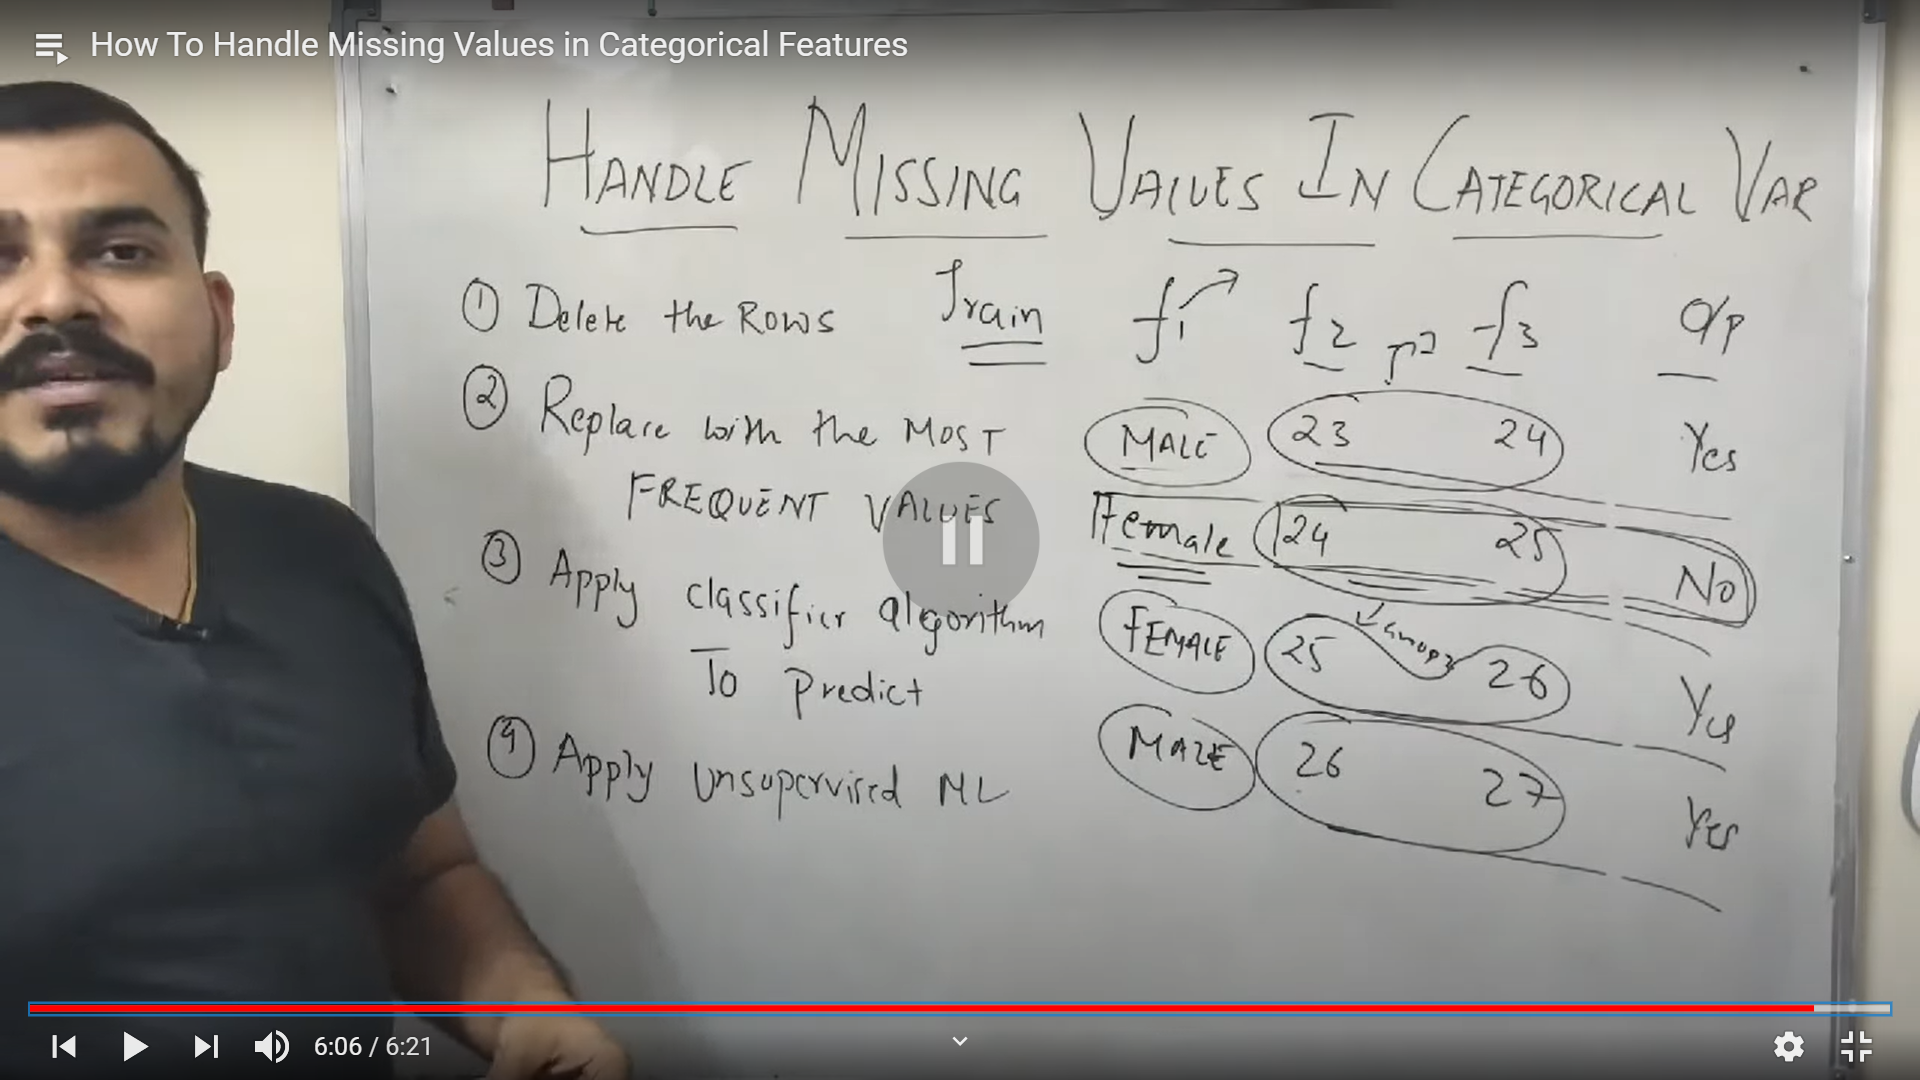

### T5-Handle categorical features - Many Categories (Count/Frequency Encoding) 

If Rank Countries based on GDP - Then it becomes Ordinal. \
If you only have Country name or State name then you cannot rank them - Nominal Encoding

#### Count/Frequency Encoding

##### High Cardinality

If feature has Higher no of Categories then we can call that variable with High Cardinality \
If we use One hot encoding then it will increase the dimension space dramtically 

In Count/Frequency Encoding , each label of categorical variable is replaced by COUNT , This is amount of time each label appears in dataset \
Or by FREQUENCY , This is percentage of observation within that category.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('mercedesbenz.csv',usecols=['X1','X2'])
df.head()

X1  X2
0  v  at
1  t  av
2  w   n
3  t   n
4  v   n

In [3]:
### X1 and X2 have high cardinality ration
print(len(df['X1'].unique()))
print(len(df['X2'].unique()))

27
44


In [4]:
## If we use One hot Encoding , Dimension size increases
pd.get_dummies(df).shape

(4209, 71)

In [8]:
## Will identify the Count of Each Category in Each Variable
df['X2'].value_counts().to_dict()

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'k': 25,
 'i': 25,
 'b': 21,
 'ao': 20,
 'ag': 19,
 'z': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'y': 11,
 'ap': 11,
 'x': 10,
 'aw': 8,
 'at': 6,
 'h': 6,
 'an': 5,
 'al': 5,
 'q': 5,
 'p': 4,
 'ah': 4,
 'av': 4,
 'au': 3,
 'l': 1,
 'c': 1,
 'aa': 1,
 'o': 1,
 'af': 1,
 'ar': 1,
 'am': 1,
 'j': 1}

In [9]:
## Now we will replace each label in X2 by its count
## First we will create dictionary which will map each label to the counts
df_frequency_map =df['X2'].value_counts().to_dict()

In [10]:
df['X2'] = df['X2'].map(df_frequency_map)
df.head(15)

X1    X2
0   v     6
1   t     4
2   w   137
3   t   137
4   v   137
5   b    81
6   r    81
7   l  1659
8   s  1659
9   b    63
10  r   153
11  r    81
12  b   415
13  r    81
14  s  1659

#### Advantages

1.Simple \
2.Does not increase Feature Dimensional Space

#### Disadvantages

1.If some of label have count , then they will be replaced by same count and will loose valuable information \
2.Adds Arbitary numbers and therefore weights to different labels , that may not be related to their predictive power

https://www.kaggle.com/general/16927

### T6 - How to handle Ordinal Categories

Ordinal Number Encoding / Label Encoding - We can rank them

Variables which have natural ordered categories : 
Eg - (Excellent,Good,Bad),(Fantastic/Okay/Dont Like),Student Grade(A,B,C,Fail),Education(BE,BTECH,MASTERS,PHD)

When Categorical variables are ordinal , most straightforward approach is to replace the labels by some ordinal no based on rank

#### Eg - Weekday 

Create a variable with dates and from that we wil extract weekday.Create a list of dates with 20 days difference from today

In [11]:
import datetime 
df_base = datetime.datetime.today()
df_date_list = [df_base - datetime.timedelta(days=x) for x in range(0,20)]
df = pd.DataFrame(df_date_list)
df.columns = ['day']
df

day
0  2020-10-31 12:00:52.518
1  2020-10-30 12:00:52.518
2  2020-10-29 12:00:52.518
3  2020-10-28 12:00:52.518
4  2020-10-27 12:00:52.518
5  2020-10-26 12:00:52.518
6  2020-10-25 12:00:52.518
7  2020-10-24 12:00:52.518
8  2020-10-23 12:00:52.518
9  2020-10-22 12:00:52.518
10 2020-10-21 12:00:52.518
11 2020-10-20 12:00:52.518
12 2020-10-19 12:00:52.518
13 2020-10-18 12:00:52.518
14 2020-10-17 12:00:52.518
15 2020-10-16 12:00:52.518
16 2020-10-15 12:00:52.518
17 2020-10-14 12:00:52.518
18 2020-10-13 12:00:52.518
19 2020-10-12 12:00:52.518

In [16]:
df['day_of_week'] = df['day'].dt.day_name()
df.head()

day day_of_week
0 2020-10-31 12:00:52.518    Saturday
1 2020-10-30 12:00:52.518      Friday
2 2020-10-29 12:00:52.518    Thursday
3 2020-10-28 12:00:52.518   Wednesday
4 2020-10-27 12:00:52.518     Tuesday

In [17]:
# Replace Categorical var with Ordinal no
weekday_map = {
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
}
df['day_orginal'] = df['day_of_week'].map(weekday_map)
df.head(20)

day day_of_week  day_orginal
0  2020-10-31 12:00:52.518    Saturday            6
1  2020-10-30 12:00:52.518      Friday            5
2  2020-10-29 12:00:52.518    Thursday            4
3  2020-10-28 12:00:52.518   Wednesday            3
4  2020-10-27 12:00:52.518     Tuesday            2
5  2020-10-26 12:00:52.518      Monday            1
6  2020-10-25 12:00:52.518      Sunday            7
7  2020-10-24 12:00:52.518    Saturday            6
8  2020-10-23 12:00:52.518      Friday            5
9  2020-10-22 12:00:52.518    Thursday            4
10 2020-10-21 12:00:52.518   Wednesday            3
11 2020-10-20 12:00:52.518     Tuesday            2
12 2020-10-19 12:00:52.518      Monday            1
13 2020-10-18 12:00:52.518      Sunday            7
14 2020-10-17 12:00:52.518    Saturday            6
15 2020-10-16 12:00:52.518      Friday            5
16 2020-10-15 12:00:52.518    Thursday            4
17 2020-10-14 12:00:52.518   Wednesday            3
18 2020-10-13 12:00:52.518     Tuesday            2
19 2020-10-12 12:00:52.518      Monday            1

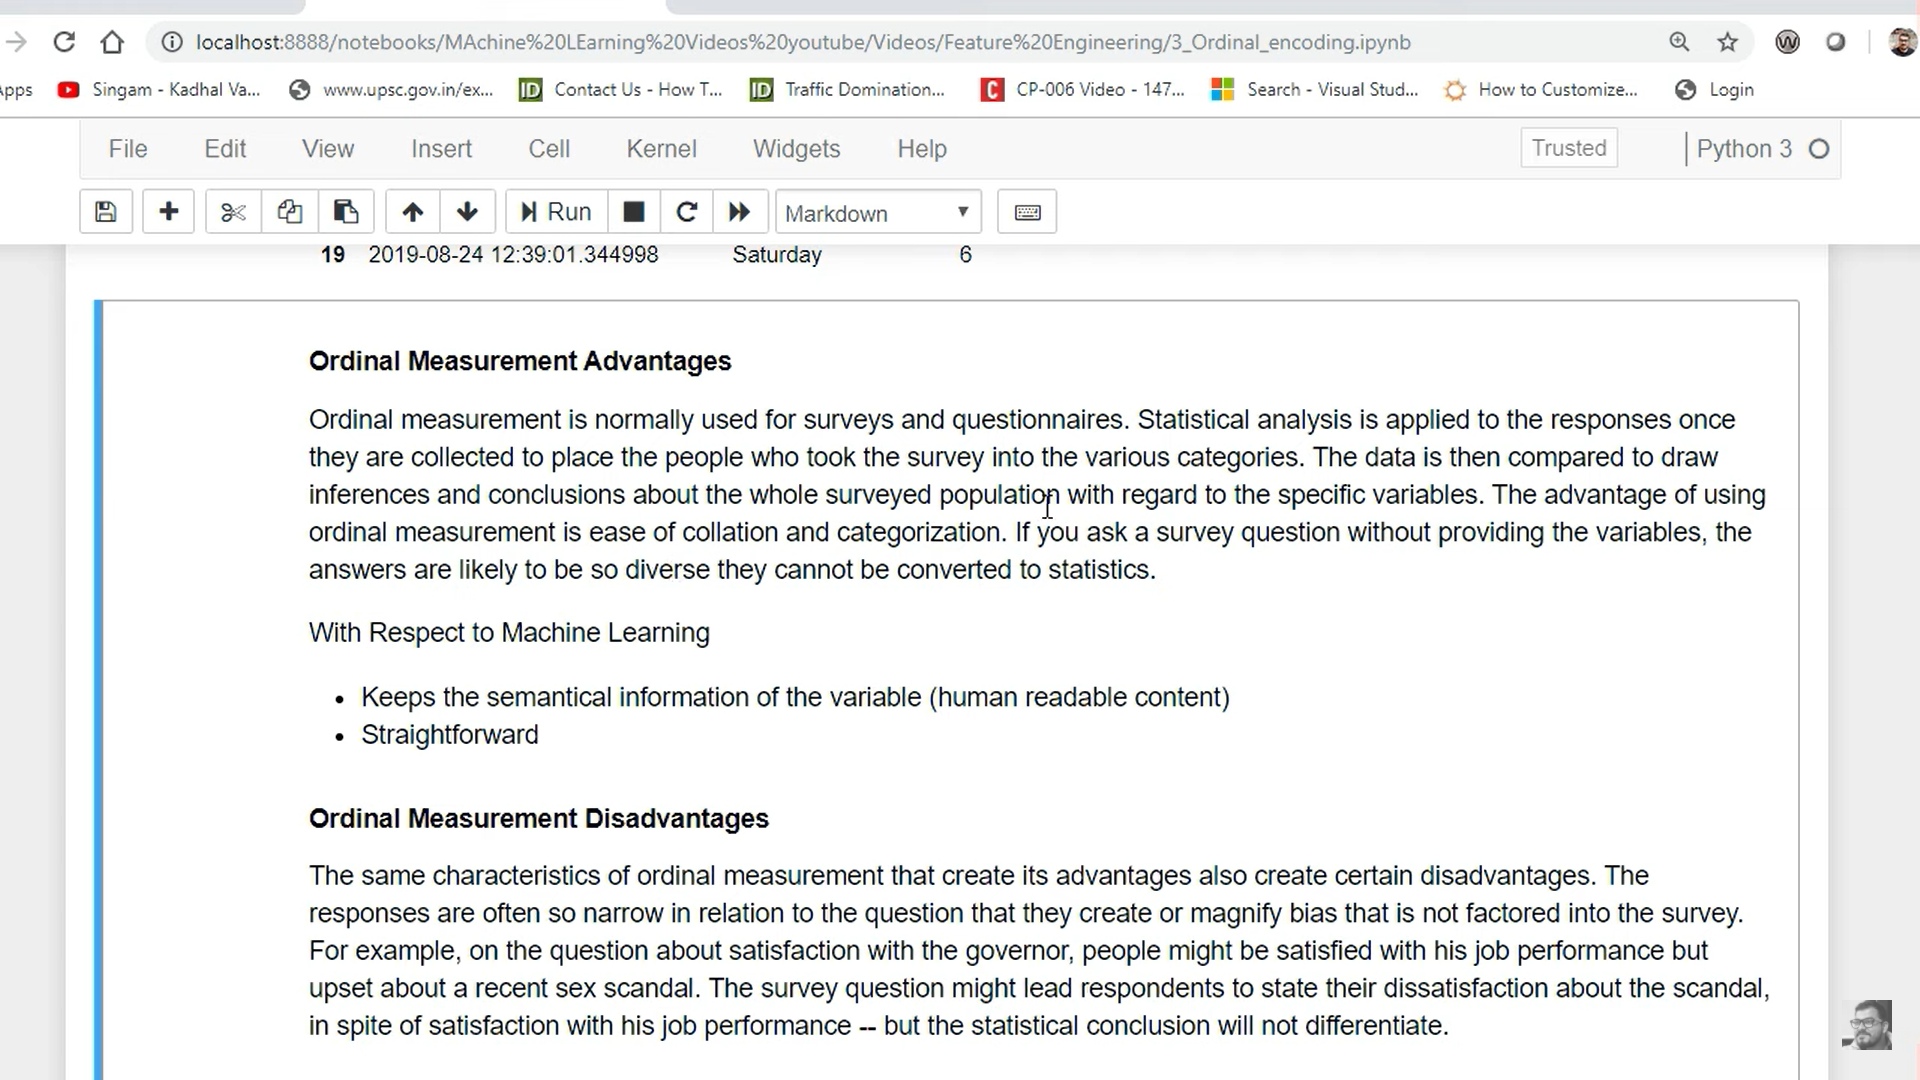

## Live Classes

### All Techniques to handle Missing Values - DAY1



####  Different Types of Missing Data

#### 1. MCAR (Missing Completely at Random)

A varaible is MCAR if probability of being missing is same for all observation.When data is MCAR,there is no relationship between data missing and any other values,observered or missing within dataset

#### 2. MNAR (Missing Not at Random)

Systematic Missing Values . There is relationship between data missing and any other values,observered or missing within dataset

#### 3. MAR (Missing at Random)

Randomly showing missing values irrespective of whether they are survived or not \
Men - Hide their Salary \
Women - Hide their Age


In [1]:
import pandas as pd
df = pd.read_csv('titanic_train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age and Cabin has more missing values . There is relationship between Age and Cabin.These details are captured after the accident has happened.So we dont know who was that person who died and what was his age. That person may be in that cabins.

So can we say that AGE and CABIN values are Missing Completely at RANDOM ?
- MCAR says there is no relationship between missing values,But here we found that there might be relationship between AGE and CABIN

So AGE and CABIN are not MCAR

EMBARKED is MCAR

In [3]:
df[df['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

#### MNAR - Cabin and Age 

In [4]:
## Wherever the cabin is having null value replace it with 1 or else 0
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

## Find percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [5]:
groupsurvived = df.groupby(['Survived'])
for groupname,group in groupsurvived:
    print(groupname)
    print(group)

0
     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
6              7         0       1                   McCarthy, Mr. Timothy J   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      

In [6]:
df.groupby(['Survived']).describe()

PassengerId                                                     \
               count        mean         std  min     25%    50%    75%   
Survived                                                                  
0              549.0  447.016393  260.640469  1.0  211.00  455.0  675.0   
1              342.0  444.368421  252.358840  2.0  250.75  439.5  651.5   

                Pclass            ...  Fare           cabin_null            \
            max  count      mean  ...   75%       max      count      mean   
Survived                          ...                                        
0         891.0  549.0  2.531876  ...  26.0  263.0000      549.0  0.876138   
1         890.0  342.0  1.950292  ...  57.0  512.3292      342.0  0.602339   

                                             
               std  min  25%  50%  75%  max  
Survived                                     
0         0.329724  0.0  1.0  1.0  1.0  1.0  
1         0.490132  0.0  0.0  1.0  1.0  1.0  

[2 rows x 56 columns]

In [7]:
## Now we will compare cabin_null and Survived to identify mean of People who survived and people who didnt survivied
## 1 - Missing , 0 - Not Missing - For Survived , Cabil should not be missing

df.groupby(['Survived'])['cabin_null'].mean()

# From survived 60% is having null values 87% having nullvalues

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [9]:
df.groupby(['Survived'])['cabin_null'].describe()

count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.876138  0.329724  0.0  1.0  1.0  1.0  1.0
1         342.0  0.602339  0.490132  0.0  0.0  1.0  1.0  1.0

### Techniques to Handle Misssing Values - Numerical 

1. Mean/Median/Mode Replacement 
2. Random Sample Imputation
3. Capturing NAN values with a new Feature
4. End of Distribution imputation
5. Arbitrary imputation

### Techniques to Handle Missing values - Cateogrical

6. Frequent Categories Imputation 
7. Adding variable to capture NAN - Categorical variable
8. Replace NaN with new Category

#### 1. Mean/Median/Mode Imputation

Replace all missing values by mean/median/mode. \
When should we apply Mean/Median/Mode Imputation ? \

Mean/Median imputation has assumption that data are missing completely completely at Ranodom (MCAR). \
We solve these by replacing  NAN with most frequent occurence of variable(Mode)

In [10]:
df = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head() 

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [12]:
# Sum of missing values
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [13]:
#Percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [14]:
def impute_nan_mean_median_mode(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)

In [15]:
# We are not taking mean because there may be some outliers
median = df['Age'].median()
median

28.0

In [16]:
impute_nan_mean_median_mode(df,'Age',median)
df.head()

Survived   Age     Fare  Age_median
0         0  22.0   7.2500        22.0
1         1  38.0  71.2833        38.0
2         1  26.0   7.9250        26.0
3         1  35.0  53.1000        35.0
4         0  35.0   8.0500        35.0

In [17]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
dtype: int64

Now we will whether STD is changed for Age and Age_median


In [18]:
print(df.Age.std())
print(df.Age_median.std())

14.526497332334042
13.019696550973201


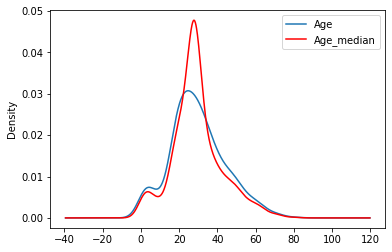

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure() 
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

## Most of NAN values got replaced by 28 . Therefore we can see spike in Age_median

#### Advantages and Disadvantages of Mean/Median/Mode Imputation 

#### Advantages
1.Easy to Implement (Robust to outliers \
2.Faster way to obtain complete dataset

#### Disadvantages
1.Change or Distortion in variance of data \
2.Impacts correlation

### Techniques to handle Missing values - Day 2

#### 2. Random Sample Imputation

It takes random observation from dataset.And using that random onservation we will try to replace nan values.It is similar to Mean/Median/Mode Imputation

When should we use ? \
It assumes that data are missing completely at Random (MCAR)

In [20]:
df = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [21]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [24]:
## Will take any sample value from dataset
df.Age.dropna().sample()

855    18.0
Name: Age, dtype: float64

In [28]:
random_sample = df.Age.dropna().sample(df.Age.isnull().sum(),random_state=0) #Will replace null values with some sample - We need to have 177 sample values
random_sample

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [27]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [29]:
random_sample.index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [30]:
random_sample.index = df[df['Age'].isnull()].index
random_sample

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [31]:
def impute_nan(df,variable,median):
    ## Nan values will get replaced by median
    df[variable+'_median'] = df[variable].fillna(median)
    
    ## Nan values will get replaced by Random sample
    df[variable+'_random'] = df[variable]
    
    ## It will have random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    ## pandas need same index in order to merge dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    

In [32]:
median = df.Age.median()
median

28.0

In [34]:
impute_nan(df,'Age',median)

In [35]:
df.head()

Survived   Age     Fare  Age_median  Age_random
0         0  22.0   7.2500        22.0        22.0
1         1  38.0  71.2833        38.0        38.0
2         1  26.0   7.9250        26.0        26.0
3         1  35.0  53.1000        35.0        35.0
4         0  35.0   8.0500        35.0        35.0

In [36]:
df[df['Age'].isnull()]

Survived  Age     Fare  Age_median  Age_random
5           0  NaN   8.4583        28.0       28.00
17          1  NaN  13.0000        28.0       50.00
19          1  NaN   7.2250        28.0        0.92
26          0  NaN   7.2250        28.0       36.00
28          1  NaN   7.8792        28.0       26.00
..        ...  ...      ...         ...         ...
859         0  NaN   7.2292        28.0       22.00
863         0  NaN  69.5500        28.0       25.00
868         0  NaN   9.5000        28.0       15.00
878         0  NaN   7.8958        28.0       34.00
888         0  NaN  23.4500        28.0       15.00

[177 rows x 5 columns]

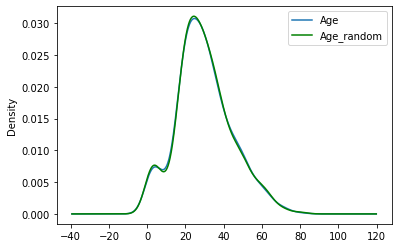

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure() 
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='green') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


## Both Age and Age_random are same , Previous we have seen that there was spike

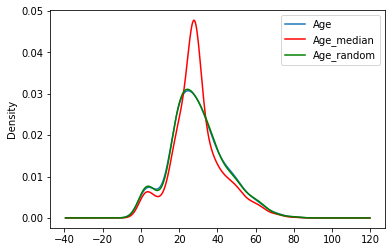

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure() 
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red') 
df.Age_random.plot(kind='kde', ax=ax, color='green') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#### Advantages and Disadvantages of Mean/Median/Mode Imputation 

#### Advantages
1.Easy to Implement (Robust to outliers \
2.There is less Distortion

#### Disadvantages
1.Randomness wont work in every situation

### 3. Capturing NAN values with new Feature

It works well when data is Missing not at random (MNAR)

In [41]:
df = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [42]:
import numpy as np
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)
df.head()

Survived   Age     Fare  Age_NAN
0         0  22.0   7.2500        0
1         1  38.0  71.2833        0
2         1  26.0   7.9250        0
3         1  35.0  53.1000        0
4         0  35.0   8.0500        0

In [43]:
# Importance of missing value is captured in new feature , Now we can replace null value of original feature with median or any other method

df['Age'].fillna(df.Age.median(),inplace=True)
df.head(10)

## these will help model that THERE is some importance 

Survived   Age     Fare  Age_NAN
0         0  22.0   7.2500        0
1         1  38.0  71.2833        0
2         1  26.0   7.9250        0
3         1  35.0  53.1000        0
4         0  35.0   8.0500        0
5         0  28.0   8.4583        1
6         0  54.0  51.8625        0
7         0   2.0  21.0750        0
8         1  27.0  11.1333        0
9         1  14.0  30.0708        0

#### Advantages
1.Easy to implement \
2.Captures importance of missing values

#### Disadvantage
1.Creating Addtional Features


### 4. End of Distribution Imputation

It captures importane of NAN values

In [44]:
df = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

<AxesSubplot:>

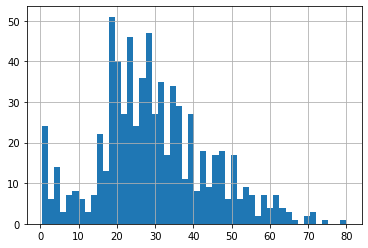

In [46]:
df.Age.hist(bins=50)

In [49]:
##Now we will take far end of distribution - We will take value after 3rd std deviation of Normal Distribution

extreme = df.Age.mean() + 3 * df.Age.std()
extreme

73.27860964406094

In [52]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    
    # Now we will replace age nan value with median
    df[variable].fillna(median,inplace=True)

In [53]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [55]:
df.head()

Survived   Age     Fare  Age_end_distribution
0         0  22.0   7.2500                  22.0
1         1  38.0  71.2833                  38.0
2         1  26.0   7.9250                  26.0
3         1  35.0  53.1000                  35.0
4         0  35.0   8.0500                  35.0

In [56]:
df[df['Age']==median]

Survived   Age     Fare  Age_end_distribution
5           0  28.0   8.4583              73.27861
17          1  28.0  13.0000              73.27861
19          1  28.0   7.2250              73.27861
23          1  28.0  35.5000              28.00000
26          0  28.0   7.2250              73.27861
..        ...   ...      ...                   ...
868         0  28.0   9.5000              73.27861
874         1  28.0  24.0000              28.00000
878         0  28.0   7.8958              73.27861
883         0  28.0  10.5000              28.00000
888         0  28.0  23.4500              73.27861

[202 rows x 4 columns]

<AxesSubplot:>

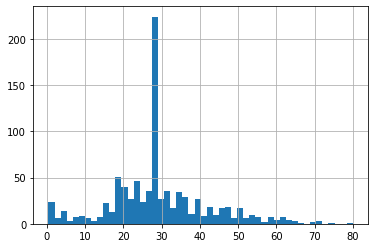

In [57]:
df['Age'].hist(bins=50)

<AxesSubplot:>

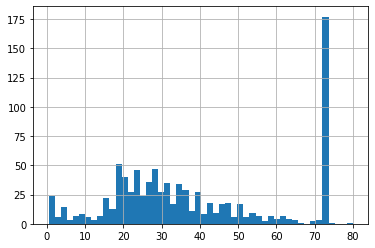

In [58]:
df['Age_end_distribution'].hist(bins=50)

#### So when we replaced it via Median , we got spike in variance at middle , When we replaced it via End Distribtuion spike is at end

#### Which one is better , Earlier we found outliers if we use above methods and not End Distribution , When we used these there is no outliers


C:\Users\Lucky_Rathod\Anaconda3\envs\kn_course\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

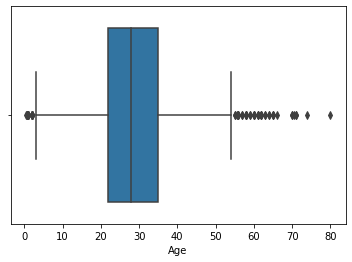

In [60]:
import seaborn as sns
sns.boxplot('Age',data=df)

C:\Users\Lucky_Rathod\Anaconda3\envs\kn_course\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age_end_distribution'>

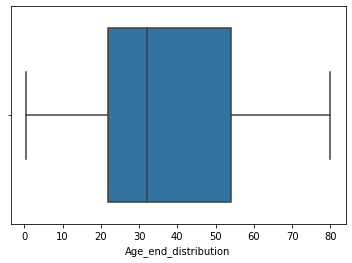

In [61]:
sns.boxplot('Age_end_distribution',data=df)

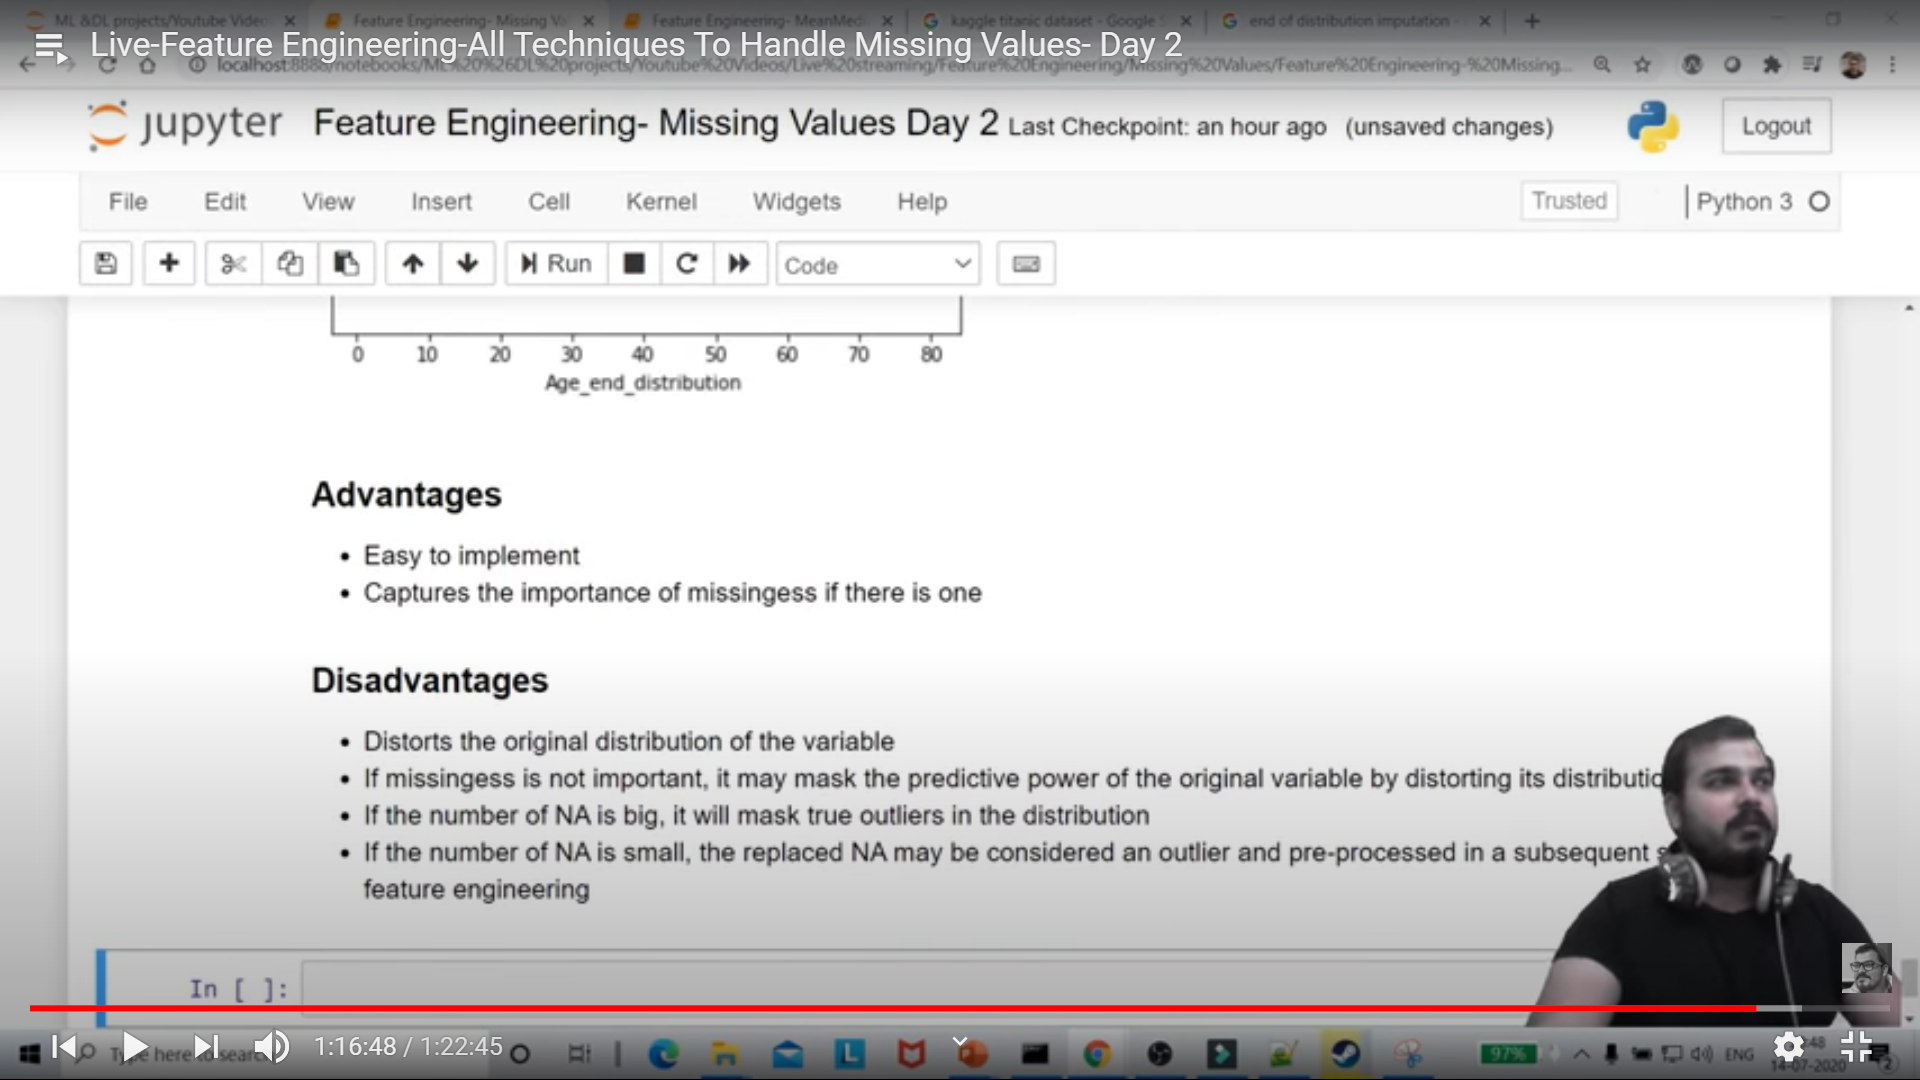

### Techniques to handle Missing values - Day 3

#### 5. Arbitrary Value Imputation

It consist of replacing NAN by Arbitrary value

In [1]:
import pandas as pd
df = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

<AxesSubplot:>

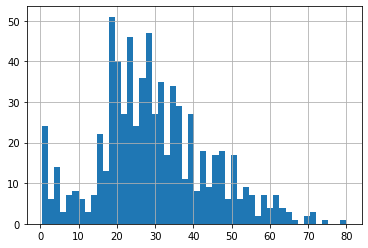

In [2]:
df['Age'].hist(bins=50)

In [5]:
## Arbitrary value can be in range of outlier 

### Properties of Arbitrary value

# 1.It should not be more frequently present

def impute_nan(df,variable):
    df[variable+'_zeros'] = df[variable].fillna(0)
    df[variable+'_Eighty'] = df[variable].fillna(80)
    df[variable+'_hundred'] = df[variable].fillna(100)


In [6]:
impute_nan(df,'Age')

In [7]:
df

Survived   Age     Fare  Age_zeros  Age_Eighty  Age_hundred
0           0  22.0   7.2500       22.0        22.0         22.0
1           1  38.0  71.2833       38.0        38.0         38.0
2           1  26.0   7.9250       26.0        26.0         26.0
3           1  35.0  53.1000       35.0        35.0         35.0
4           0  35.0   8.0500       35.0        35.0         35.0
..        ...   ...      ...        ...         ...          ...
886         0  27.0  13.0000       27.0        27.0         27.0
887         1  19.0  30.0000       19.0        19.0         19.0
888         0   NaN  23.4500        0.0        80.0        100.0
889         1  26.0  30.0000       26.0        26.0         26.0
890         0  32.0   7.7500       32.0        32.0         32.0

[891 rows x 6 columns]

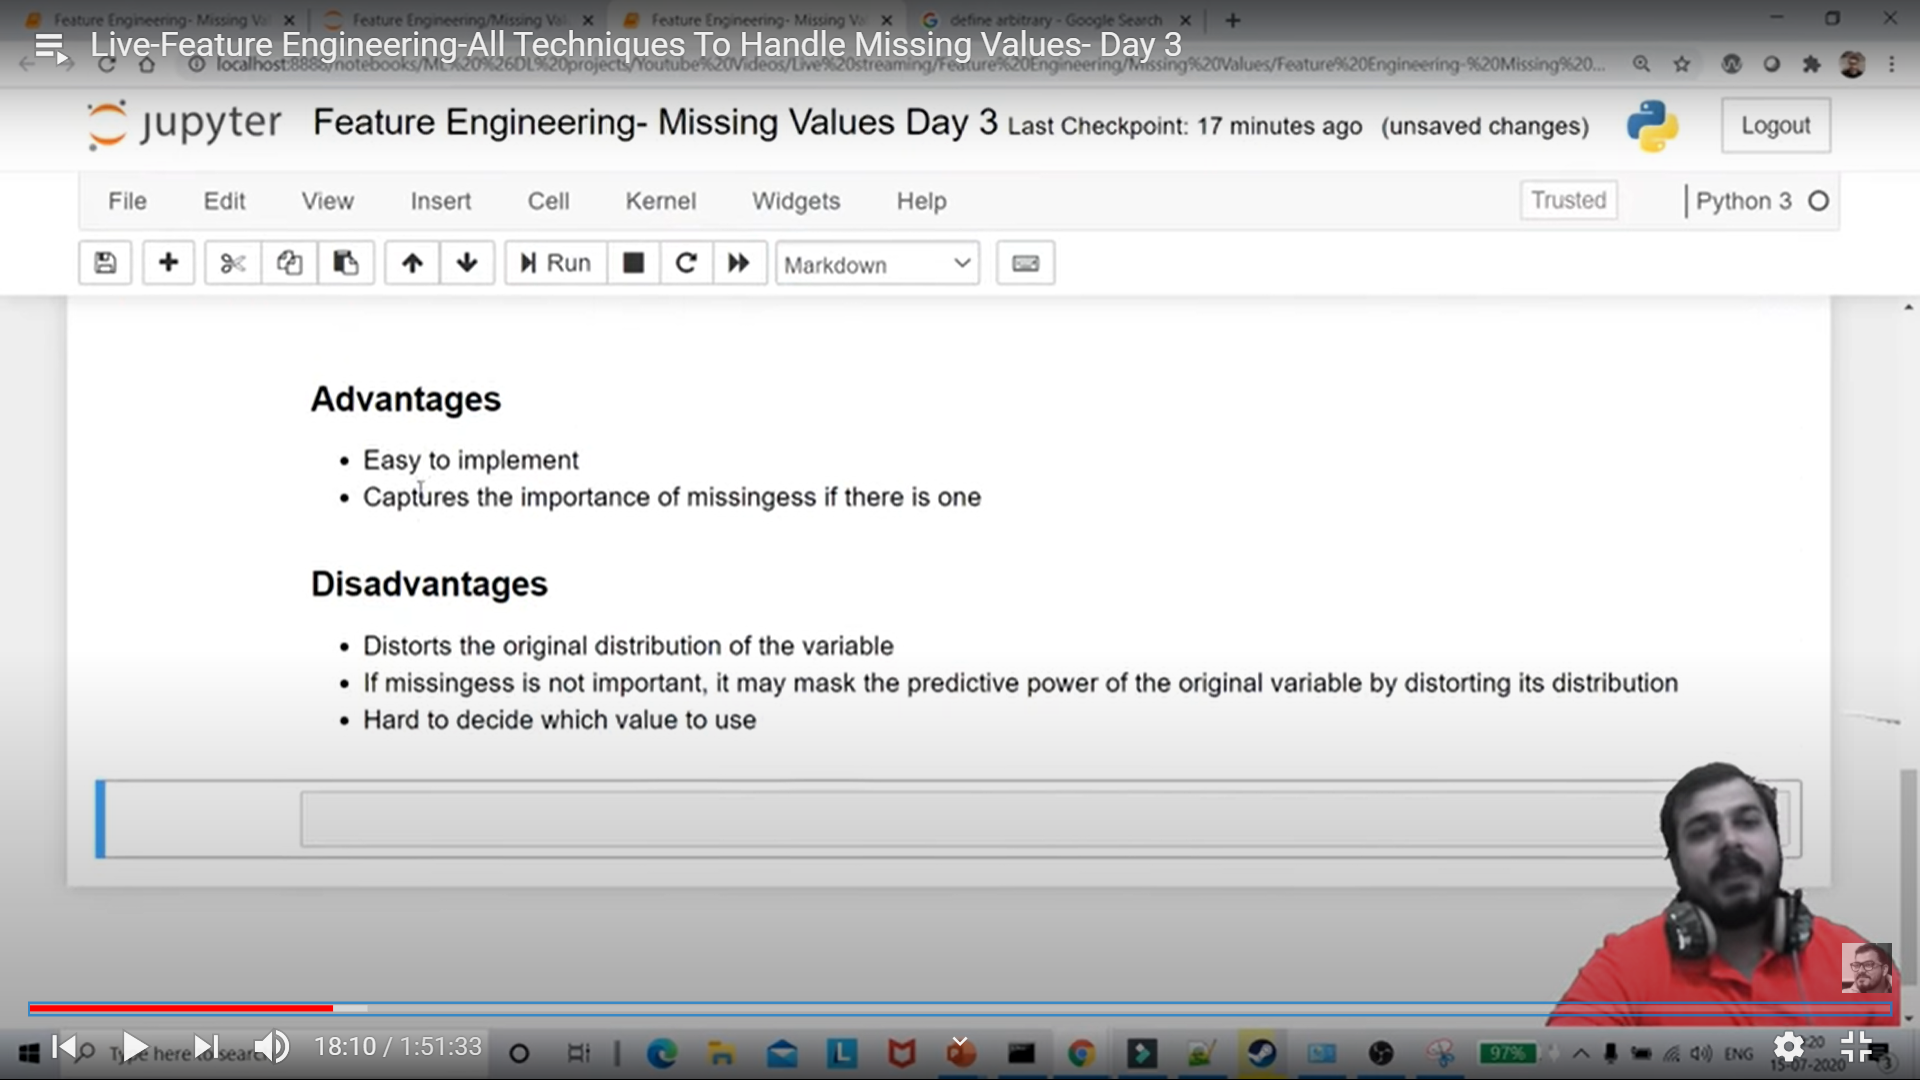

### How to handle Categorical Features

### 6. Frequent Category Imputation



In [10]:
import pandas as pd

### House price prediction dataset
df = pd.read_csv('house_price_loan_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

BsmtQual: Evaluates the height of the basement \
* Ex Excellent (100+ inches)	
* Gd	Good (90-99 inches)
* TA	Typical (80-89 inches)
* Fa	Fair (70-79 inches)
* Po	Poor (<70 inches
* NA	No Basement
       
FireplaceQu: Fireplace quality \
* Ex	Excellent - Exceptional Masonry Fireplace
* Gd	Good - Masonry Fireplace in main level
* TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
* Fa	Fair - Prefabricated Fireplace in basement
* Po	Poor - Ben Franklin Stove
* NA	No Fireplace
        
GarageType: Garage location \
* 2Types	More than one type of garage
* Attchd	Attached to home
* Basment	Basement Garage
* BuiltIn	Built-In (Garage part of house - typically has room above garage)
* CarPort	Car Port
* Detchd	Detached from home
* NA	No Garage


In [11]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [12]:
# Percentage
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [13]:
# Since BsmtQual and GarageType has less missing values , replacing it with most frequent categories wont do any distortion

## Compute Frequency with every feature
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [14]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

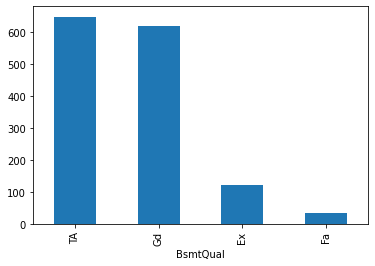

In [16]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [18]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [24]:
df['GarageType'].mode()

0    Attchd
dtype: object

In [19]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [20]:
df['FireplaceQu'].value_counts().index[0]

'Gd'

In [21]:
def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [22]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [23]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

##### When we replace FireplaceQu which has 47% missing values will Distort the relationship of most frequent category with sales price.
#####  This is one of Disadvantage when the missing value percentage is very High

#### Advantages 
1. Easy and Faster to implement

#### DisAdvantages
1. Since we are using more frequent labels , it may use them in an over represented way , if there are many Nans
2. It distorts relation of most frequent labels

### 7. Adding varaible to capture NAN - Categorical variable

In [26]:
df = pd.read_csv('house_price_loan_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [27]:
df['BsmtQual_new_var'] = np.where(df['BsmtQual'].isnull(),1,0)
df.head()

<IPython.core.display.Javascript object>

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_new_var
0       Gd         NaN     Attchd     208500                 0
1       Gd          TA     Attchd     181500                 0
2       Gd          TA     Attchd     223500                 0
3       TA          Gd     Detchd     140000                 0
4       Gd          TA     Attchd     250000                 0

#### Then you can replace BsmtQual null values with  most frequent category

In [28]:
def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)
impute_nan(df,'BsmtQual')

In [31]:
df[df['BsmtQual_new_var']==1]

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_new_var
17         TA         NaN    CarPort      90000                 1
39         TA         NaN        NaN      82000                 1
90         TA         NaN     Detchd     109900                 1
102        TA         NaN     Attchd     118964                 1
156        TA         NaN     Detchd     109500                 1
182        TA          Gd     Attchd     120000                 1
259        TA         NaN     Detchd      97000                 1
342        TA         NaN     Detchd      87500                 1
362        TA          Ex    BuiltIn     198500                 1
371        TA          Gd     Detchd     134432                 1
392        TA         NaN     Attchd     106500                 1
520        TA         NaN        NaN     106250                 1
532        TA          Po     Detchd     107500                 1
533        TA         NaN        NaN      39300                 1
553        TA         NaN     Detchd     108000                 1
646        TA         NaN     Detchd      98300                 1
705        TA         NaN        NaN      55000                 1
736        TA         NaN     Detchd      93500                 1
749        TA         NaN     Detchd      98000                 1
778        TA          TA     Detchd     144000                 1
868        TA          TA     Attchd     169000                 1
894        TA         NaN     Attchd     118858                 1
897        TA         NaN     Detchd     142953                 1
984        TA         NaN     Attchd     126000                 1
1000       TA         NaN     Detchd      82000                 1
1011       TA         NaN        NaN     100000                 1
1035       TA         NaN     Detchd      84000                 1
1045       TA          Gd     Attchd     139600                 1
1048       TA          TA     Attchd     115000                 1
1049       TA         NaN     Detchd      84900                 1
1090       TA         NaN     Detchd      92900                 1
1179       TA          Gd        NaN      93000                 1
1216       TA         NaN     Attchd     112000                 1
1218       TA         NaN        NaN      80500                 1
1232       TA         NaN    CarPort     101800                 1
1321       TA         NaN     Detchd      72500                 1
1412       TA         NaN     Detchd      90000                 1

In [32]:
df['FireplaceQu_new_var'] = np.where(df['FireplaceQu'].isnull(),1,0)
df.head()

<IPython.core.display.Javascript object>

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_new_var  \
0       Gd         NaN     Attchd     208500                 0   
1       Gd          TA     Attchd     181500                 0   
2       Gd          TA     Attchd     223500                 0   
3       TA          Gd     Detchd     140000                 0   
4       Gd          TA     Attchd     250000                 0   

   FireplaceQu_new_var  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0

In [33]:
impute_nan(df,'FireplaceQu')

In [34]:
df[df['FireplaceQu_new_var']==1]

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_new_var  \
0          Gd          Gd     Attchd     208500                 0   
5          Gd          Gd     Attchd     143000                 0   
10         TA          Gd     Detchd     129500                 0   
12         TA          Gd     Detchd     144000                 0   
15         TA          Gd     Detchd     132000                 0   
...       ...         ...        ...        ...               ...   
1452       Gd          Gd    Basment     145000                 0   
1453       Gd          Gd        NaN      84500                 0   
1454       Gd          Gd     Attchd     185000                 0   
1458       TA          Gd     Attchd     142125                 0   
1459       TA          Gd     Attchd     147500                 0   

      FireplaceQu_new_var  
0                       1  
5                       1  
10                      1  
12                      1  
15                      1  
...                   ...  
1452                    1  
1453                    1  
1454                    1  
1458                    1  
1459                    1  

[690 rows x 6 columns]

In [35]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_new_var  \
0       Gd          Gd     Attchd     208500                 0   
1       Gd          TA     Attchd     181500                 0   
2       Gd          TA     Attchd     223500                 0   
3       TA          Gd     Detchd     140000                 0   
4       Gd          TA     Attchd     250000                 0   

   FireplaceQu_new_var  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0

### 8. Replace NAN with new Category

In [36]:
df = pd.read_csv('house_price_loan_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [37]:
def impute_nan(df,variable):
    df[variable+'_newvar'] = np.where(df[variable].isnull(),"Missing",df[variable])

In [38]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
df

BsmtQual FireplaceQu GarageType  SalePrice BsmtQual_newvar  \
0          Gd         NaN     Attchd     208500              Gd   
1          Gd          TA     Attchd     181500              Gd   
2          Gd          TA     Attchd     223500              Gd   
3          TA          Gd     Detchd     140000              TA   
4          Gd          TA     Attchd     250000              Gd   
...       ...         ...        ...        ...             ...   
1455       Gd          TA     Attchd     175000              Gd   
1456       Gd          TA     Attchd     210000              Gd   
1457       TA          Gd     Attchd     266500              TA   
1458       TA         NaN     Attchd     142125              TA   
1459       TA         NaN     Attchd     147500              TA   

     FireplaceQu_newvar GarageType_newvar  
0               Missing            Attchd  
1                    TA            Attchd  
2                    TA            Attchd  
3                    Gd            Detchd  
4                    TA            Attchd  
...                 ...               ...  
1455                 TA            Attchd  
1456                 TA            Attchd  
1457                 Gd            Attchd  
1458            Missing            Attchd  
1459            Missing            Attchd  

[1460 rows x 7 columns]

In [40]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head()

SalePrice BsmtQual_newvar FireplaceQu_newvar GarageType_newvar
0     208500              Gd            Missing            Attchd
1     181500              Gd                 TA            Attchd
2     223500              Gd                 TA            Attchd
3     140000              TA                 Gd            Detchd
4     250000              Gd                 TA            Attchd

## Feature Engineering - Handling Categorical features 

### Nominal Encoding

1. OneHot Encoding
2. OneHot Encoding with many categorical variables
3. Mean Encoding
4. Count/Frequency Encoding
5. Probability Ration Encoding

### Ordinal Encoding

1. Label Encoding
2. Target Guided Ordinal Encoding


### 1. One Hot Encoding


In [41]:
import pandas as pd
df = pd.read_csv('titanic_train.csv',usecols=['Sex'])
df.head()

Sex
0    male
1  female
2  female
3  female
4    male

In [42]:
df.isnull().sum()

Sex    0
dtype: int64

In [43]:
pd.get_dummies(df).head() #Columns order will be in alphabetical order

Sex_female  Sex_male
0           0         1
1           1         0
2           1         0
3           1         0
4           0         1

In [44]:
## To avoid dummy varaible trap
pd.get_dummies(df,drop_first=True).head()

Sex_male
0         1
1         0
2         0
3         0
4         1

In [46]:
df = pd.read_csv('titanic_train.csv',usecols=['Embarked'])
df.head()

Embarked
0        S
1        C
2        S
3        S
4        S

In [47]:
df.isnull().sum()

Embarked    2
dtype: int64

In [50]:
df.dropna(inplace=True)
df.isnull().sum()

Embarked    0
dtype: int64

In [51]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [52]:
pd.get_dummies(df).head()

Embarked_C  Embarked_Q  Embarked_S
0           0           0           1
1           1           0           0
2           0           0           1
3           0           0           1
4           0           0           1

In [53]:
pd.get_dummies(df,drop_first=True).head()

Embarked_Q  Embarked_S
0           0           1
1           0           0
2           0           1
3           0           1
4           0           1

### 2. One hot Encoding with many categories in Feature

#### Follow T1 - How to perform One Hot Encoding for Multiple categorical Features

### 3. Mean Encoding

We directly replace the value with mean value which we got after groupby


In [91]:
df = pd.read_csv('titanic_train.csv',usecols=['Cabin','Survived'])
df.head()

Survived Cabin
0         0   NaN
1         1   C85
2         1   NaN
3         1  C123
4         0   NaN

In [92]:
df.Cabin.fillna('Missing',inplace=True)
df.head()

Survived    Cabin
0         0  Missing
1         1      C85
2         1  Missing
3         1     C123
4         0  Missing

In [93]:
## Will take only first letter of block
df['Cabin']= df['Cabin'].astype(str).str[0]
df.head()

Survived Cabin
0         0     M
1         1     C
2         1     M
3         1     C
4         0     M

In [96]:
mean_ordinal = df.groupby(['Cabin'])['Survived'].mean().to_dict()
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [97]:
df['mean_ordinal_encode'] = df['Cabin'].map(mean_ordinal)
df.head()

Survived Cabin  mean_ordinal_encode
0         0     M             0.299854
1         1     C             0.593220
2         1     M             0.299854
3         1     C             0.593220
4         0     M             0.299854

### Disadvantages

1. It leads to overfitting

### 4. Count / Frequency encoding

In [66]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None,index_col=None) 
train_set.head()

0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                   6               7       8        9     10  11  12  \
0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
1     Exec-managerial         Husband   White     Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
3   Handlers-cleaners         Husband   Black     Male     0   0  40   
4      Prof-specialty            Wife   Black   Female     0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-States   <=50K  
4            Cuba   <=50K

In [70]:
columns = [1,3,5,6,7,8,9,13]
train_set = train_set[columns]

In [71]:
train_set.head()

1           3                    5                   6   \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

               7       8        9               13  
0   Not-in-family   White     Male   United-States  
1         Husband   White     Male   United-States  
2   Not-in-family   White     Male   United-States  
3         Husband   Black     Male   United-States  
4            Wife   Black   Female            Cuba

In [72]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']
train_set.head()

Employment      Degree               Status         Designation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

       family_job    Race      Sex         Country  
0   Not-in-family   White     Male   United-States  
1         Husband   White     Male   United-States  
2   Not-in-family   White     Male   United-States  
3         Husband   Black     Male   United-States  
4            Wife   Black   Female            Cuba

In [74]:
 for col in train_set.columns:
        print(col,':',len(train_set[col].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [77]:
country_map = train_set['Country'].value_counts().to_dict()
country_map

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Thailand': 18,
 ' Laos': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [78]:
train_set['Country'] = train_set['Country'].map(country_map)

C:\Users\Lucky_Rathod\Anaconda3\envs\kn_course\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
train_set.head()

Employment      Degree               Status         Designation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

       family_job    Race      Sex  Country  
0   Not-in-family   White     Male    29170  
1         Husband   White     Male    29170  
2   Not-in-family   White     Male    29170  
3         Husband   Black     Male    29170  
4            Wife   Black   Female       95

### Advantages
1. Not increasing Feature space

### Disadvantages
1.It will provide same weight if frequency is same 

### 5. Probability Ratio Encoding

Find out percentage of Dependent variable (Survived and Died) - It can only be used for Binary Dependent variable

Probability Ratio Encoding is ratio of Probability of Survived and Probability of Died

In [1]:
import pandas as pd
df = pd.read_csv('titanic_train.csv',usecols=['Cabin','Survived'])
df.head()

Survived Cabin
0         0   NaN
1         1   C85
2         1   NaN
3         1  C123
4         0   NaN

In [3]:
#Replacing
df['Cabin'].fillna('Missing',inplace=True)
df.head()

Survived    Cabin
0         0  Missing
1         1      C85
2         1  Missing
3         1     C123
4         0  Missing

In [4]:
 df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [5]:
df['Cabin']= df['Cabin'].astype(str).str[0]
df.head()

Survived Cabin
0         0     M
1         1     C
2         1     M
3         1     C
4         0     M

In [6]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [9]:
prob_df = df.groupby(['Cabin'])['Survived'].mean()
# For M survival rate is 29%

In [10]:
prob_df = pd.DataFrame(prob_df)
prob_df

Survived
Cabin          
A      0.466667
B      0.744681
C      0.593220
D      0.757576
E      0.750000
F      0.615385
G      0.500000
M      0.299854
T      0.000000

#### Now we will calculate What is the probability that person has died

In [11]:
prob_df['Died'] = 1-prob_df['Survived']
prob_df

Survived      Died
Cabin                    
A      0.466667  0.533333
B      0.744681  0.255319
C      0.593220  0.406780
D      0.757576  0.242424
E      0.750000  0.250000
F      0.615385  0.384615
G      0.500000  0.500000
M      0.299854  0.700146
T      0.000000  1.000000

In [12]:
prob_df['Probability_ratio']=prob_df['Survived']/prob_df['Died']
prob_df

Survived      Died  Probability_ratio
Cabin                                       
A      0.466667  0.533333           0.875000
B      0.744681  0.255319           2.916667
C      0.593220  0.406780           1.458333
D      0.757576  0.242424           3.125000
E      0.750000  0.250000           3.000000
F      0.615385  0.384615           1.600000
G      0.500000  0.500000           1.000000
M      0.299854  0.700146           0.428274
T      0.000000  1.000000           0.000000

In [14]:
probability_encoding = prob_df['Probability_ratio'].to_dict()
probability_encoding

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [15]:
df['Cabin_Encoded'] = df['Cabin'].map(probability_encoding)
df.head()

Survived Cabin  Cabin_Encoded
0         0     M       0.428274
1         1     C       1.458333
2         1     M       0.428274
3         1     C       1.458333
4         0     M       0.428274

## Ordinal Encoding

### 1. Label Encoding

Ranking Categories - Grading System,Weekdays,Experience of Batsman

In [54]:
import datetime
today_date = datetime.datetime.today()
today_date

datetime.datetime(2020, 11, 20, 16, 53, 26, 405315)

In [55]:
## Difference between 2 datetime values
today_date - datetime.timedelta(1)

datetime.datetime(2020, 11, 19, 16, 53, 26, 405315)

In [58]:
days = [today_date-datetime.timedelta(x) for x in range(0,15)]
days

[datetime.datetime(2020, 11, 20, 16, 53, 26, 405315),
 datetime.datetime(2020, 11, 19, 16, 53, 26, 405315),
 datetime.datetime(2020, 11, 18, 16, 53, 26, 405315),
 datetime.datetime(2020, 11, 17, 16, 53, 26, 405315),
 datetime.datetime(2020, 11, 16, 16, 53, 26, 405315),
 datetime.datetime(2020, 11, 15, 16, 53, 26, 405315),
 datetime.datetime(2020, 11, 14, 16, 53, 26, 405315),
 datetime.datetime(2020, 11, 13, 16, 53, 26, 405315),
 datetime.datetime(2020, 11, 12, 16, 53, 26, 405315),
 datetime.datetime(2020, 11, 11, 16, 53, 26, 405315),
 datetime.datetime(2020, 11, 10, 16, 53, 26, 405315),
 datetime.datetime(2020, 11, 9, 16, 53, 26, 405315),
 datetime.datetime(2020, 11, 8, 16, 53, 26, 405315),
 datetime.datetime(2020, 11, 7, 16, 53, 26, 405315),
 datetime.datetime(2020, 11, 6, 16, 53, 26, 405315)]

In [60]:
data = pd.DataFrame(days)
data.columns=['Day']
data.head()

Day
0 2020-11-20 16:53:26.405315
1 2020-11-19 16:53:26.405315
2 2020-11-18 16:53:26.405315
3 2020-11-17 16:53:26.405315
4 2020-11-16 16:53:26.405315

In [62]:
data['Day'].dt.day_name()

0        Friday
1      Thursday
2     Wednesday
3       Tuesday
4        Monday
5        Sunday
6      Saturday
7        Friday
8      Thursday
9     Wednesday
10      Tuesday
11       Monday
12       Sunday
13     Saturday
14       Friday
Name: Day, dtype: object

In [63]:
data['weekday'] = data['Day'].dt.day_name()
data

Day    weekday
0  2020-11-20 16:53:26.405315     Friday
1  2020-11-19 16:53:26.405315   Thursday
2  2020-11-18 16:53:26.405315  Wednesday
3  2020-11-17 16:53:26.405315    Tuesday
4  2020-11-16 16:53:26.405315     Monday
5  2020-11-15 16:53:26.405315     Sunday
6  2020-11-14 16:53:26.405315   Saturday
7  2020-11-13 16:53:26.405315     Friday
8  2020-11-12 16:53:26.405315   Thursday
9  2020-11-11 16:53:26.405315  Wednesday
10 2020-11-10 16:53:26.405315    Tuesday
11 2020-11-09 16:53:26.405315     Monday
12 2020-11-08 16:53:26.405315     Sunday
13 2020-11-07 16:53:26.405315   Saturday
14 2020-11-06 16:53:26.405315     Friday

In [65]:
dictionaryweek = {
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
}
data['weekday_ordinal'] = data['weekday'].map(dictionaryweek)
data

Day    weekday  weekday_ordinal
0  2020-11-20 16:53:26.405315     Friday                5
1  2020-11-19 16:53:26.405315   Thursday                4
2  2020-11-18 16:53:26.405315  Wednesday                3
3  2020-11-17 16:53:26.405315    Tuesday                2
4  2020-11-16 16:53:26.405315     Monday                1
5  2020-11-15 16:53:26.405315     Sunday                7
6  2020-11-14 16:53:26.405315   Saturday                6
7  2020-11-13 16:53:26.405315     Friday                5
8  2020-11-12 16:53:26.405315   Thursday                4
9  2020-11-11 16:53:26.405315  Wednesday                3
10 2020-11-10 16:53:26.405315    Tuesday                2
11 2020-11-09 16:53:26.405315     Monday                1
12 2020-11-08 16:53:26.405315     Sunday                7
13 2020-11-07 16:53:26.405315   Saturday                6
14 2020-11-06 16:53:26.405315     Friday                5

### 2. Target Guided Ordinal Encoding

Steps

1.Ordering Labels according to target \
2.Replace labels by joint probability of being 1 or 0

In [80]:
df = pd.read_csv('titanic_train.csv',usecols=['Cabin','Survived'])
df.head()

Survived Cabin
0         0   NaN
1         1   C85
2         1   NaN
3         1  C123
4         0   NaN

In [82]:
df.Cabin.fillna('Missing',inplace=True)
df.head()

Survived    Cabin
0         0  Missing
1         1      C85
2         1  Missing
3         1     C123
4         0  Missing

In [83]:
## Will take only first letter of block
df['Cabin']= df['Cabin'].astype(str).str[0]
df.head()

Survived Cabin
0         0     M
1         1     C
2         1     M
3         1     C
4         0     M

In [84]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [85]:
df.groupby(['Cabin'])['Survived'].describe()

count      mean       std  min   25%  50%  75%  max
Cabin                                                     
A       15.0  0.466667  0.516398  0.0  0.00  0.0  1.0  1.0
B       47.0  0.744681  0.440755  0.0  0.50  1.0  1.0  1.0
C       59.0  0.593220  0.495450  0.0  0.00  1.0  1.0  1.0
D       33.0  0.757576  0.435194  0.0  1.00  1.0  1.0  1.0
E       32.0  0.750000  0.439941  0.0  0.75  1.0  1.0  1.0
F       13.0  0.615385  0.506370  0.0  0.00  1.0  1.0  1.0
G        4.0  0.500000  0.577350  0.0  0.00  0.5  1.0  1.0
M      687.0  0.299854  0.458528  0.0  0.00  0.0  1.0  1.0
T        1.0  0.000000       NaN  0.0  0.00  0.0  0.0  0.0

In [86]:
df.groupby(['Cabin'])['Survived'].mean().sort_values()

## Based on Target which has highest survival rate , We will assign higher rank to that

Cabin
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [87]:
ordinal_labels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [88]:
ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [89]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)
df.head()

Survived Cabin  Cabin_ordinal_labels
0         0     M                     1
1         1     C                     4
2         1     M                     1
3         1     C                     4
4         0     M                     1

# Tranformation of Variables


### Why Transformation is required ?

### ML Techniques

1. Linear Regression - Gradient Descent - Global Minimum
2. KNN,K-Means,Hierarchical Clustering - Euclidean Distance 

### For these we need to use Transformation

f1 f2 \
24 100 \
27 200 

We can see that difference between values of these features is very huge, Due to which Global Min and Euclidean distance cannot be found easily.

So we need to transform the values of these feature  to same scale.So that Euclidean Distance and Global minimum can be easily found

### Deep Learning Techniques

1. ANN 
2. CNN
3. RNN

Tranformation is required in Deep Learning Techniques


#### We dont need Transformation in Decision Tree/XG Boost/Ensemble Techniques

### Transformation Types 

1. Standardization - StandardScaler
2. Min Max Normalization
3. Robust Scaler - Scaling to Median and Quantiles
4. Gaussian Transformation
   - Logarithmic Transformation
   - Reciprocal Transformation
   - Square Root Transformation
   - Exponential Transformation
   - Box Cox Transformation   

### 1. Normalization and Standardization

When we consider Inpendent Features in Dataset they have 2 important Properties
1. Unit \
2. Magnitude

For Age Feature - Unit(No of years) - Eg - 25 YRS - 25(Magnitude) - yrs (Unit).

If you having many features in dataset, it will get computed by different different units and magnitude.It will not be same

Eg - Height (Unit - Feet,Inches) , Age (Yrs)

These unit or magnitude will vary in all features of dataset.So it is neccessary for Machine Learning Algorithm that data which we provide should be scaled down at particular scale. (Normalization and Standardization)

### Normalization

Normalization Helps you to scale down your feature between 0 and 1.

### Standardization

Standardization will help you to scale down your feature based on Standard Normal Distribution(Mean=0,STD=1)

Standard Normal Distribtion or Z score = (x-x_mean)/std

In [18]:
df = pd.read_csv('titanic_train.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

Survived  Pclass   Age     Fare
0         0       3  22.0   7.2500
1         1       1  38.0  71.2833
2         1       3  26.0   7.9250
3         1       1  35.0  53.1000
4         0       3  35.0   8.0500

In [19]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [20]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [21]:
### Standardization - We will use Standard Scaler from sklearn

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

##  Difference between Fit ANF Fit_transform 

'''
"fit" computes the mean and std to be used for later scaling. 
"transform" uses a previously computed mean and std to autoscale the data or transform data as per calculated by fit()
"fit_transform" will do both at same time - Calculated and Transform
'''

df_scaled = scaler.fit_transform(df)

In [22]:
pd.DataFrame(df_scaled)

0         1         2         3
0   -0.789272  0.827377 -0.565736 -0.502445
1    1.266990 -1.566107  0.663861  0.786845
2    1.266990  0.827377 -0.258337 -0.488854
3    1.266990 -1.566107  0.433312  0.420730
4   -0.789272  0.827377  0.433312 -0.486337
..        ...       ...       ...       ...
886 -0.789272 -0.369365 -0.181487 -0.386671
887  1.266990 -1.566107 -0.796286 -0.044381
888 -0.789272  0.827377 -0.104637 -0.176263
889  1.266990 -1.566107 -0.258337 -0.044381
890 -0.789272  0.827377  0.202762 -0.492378

[891 rows x 4 columns]

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

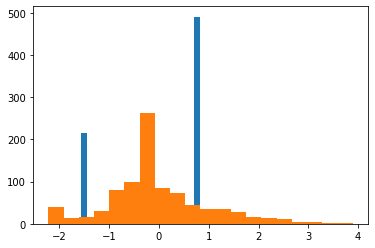

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df_scaled[:,1],bins=20)
plt.hist(df_scaled[:,2],bins=20)

### Min Max Normalization - Works Well with CNN - Deep Learning Techniques

It Transforms values between 0 and 1

X_scaled = (X-X.min)/(X.max - X.min) 

In [31]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax

Survived  Pclass       Age      Fare
0         0.0     1.0  0.271174  0.014151
1         1.0     0.0  0.472229  0.139136
2         1.0     1.0  0.321438  0.015469
3         1.0     0.0  0.434531  0.103644
4         0.0     1.0  0.434531  0.015713
..        ...     ...       ...       ...
886       0.0     0.5  0.334004  0.025374
887       1.0     0.0  0.233476  0.058556
888       0.0     1.0  0.346569  0.045771
889       1.0     0.0  0.321438  0.058556
890       0.0     1.0  0.396833  0.015127

[891 rows x 4 columns]

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

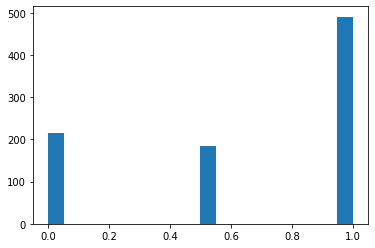

In [32]:
plt.hist(df_minmax['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

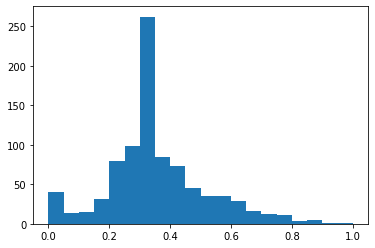

In [33]:
plt.hist(df_minmax['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

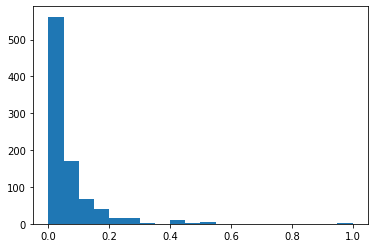

In [34]:
plt.hist(df_minmax['Fare'],bins=20)

### 3. Robust Scaler - Scaling to Median and Quantiles

Scales features to Median and Quantiles.

It consist of subtracting median to all observations,And then dividing by InterQuantile difference.Interquantile difference is difference between 75 and 25th quantile

X_robust_scaler = (X-X.median)/IQR

0,1,2,3,4,5,6,7,8,9,10
9-90 PERCENTILE - 90% of all values is less than 9
1-10 PERCENTILE - 10% of all values is less than 1


In [36]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust_scaler = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler

Survived  Pclass       Age      Fare
0         0.0     0.0 -0.461538 -0.312011
1         1.0    -2.0  0.769231  2.461242
2         1.0     0.0 -0.153846 -0.282777
3         1.0    -2.0  0.538462  1.673732
4         0.0     0.0  0.538462 -0.277363
..        ...     ...       ...       ...
886       0.0    -1.0 -0.076923 -0.062981
887       1.0    -2.0 -0.692308  0.673281
888       0.0     0.0  0.000000  0.389604
889       1.0    -2.0 -0.153846  0.673281
890       0.0     0.0  0.307692 -0.290356

[891 rows x 4 columns]

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

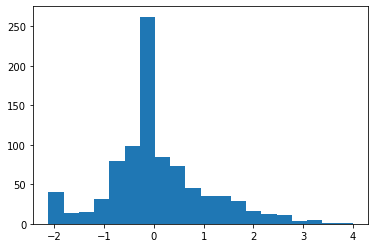

In [38]:
plt.hist(df_robust_scaler['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

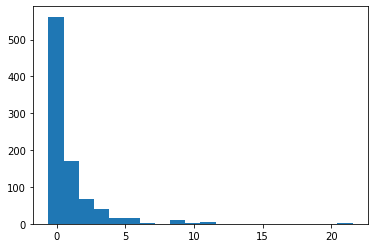

In [39]:
 plt.hist(df_robust_scaler['Fare'],bins=20)

 ### Advantages
 
1. It can also be used if there are outliers,It is more robust to outliers
 

### 4. Gaussian Transformation

If our Features is not Normally Distributed , Then we can apply below techniques to make our feature Gaussian/Normally Distributed

- Logarithmic Transformation
- Reciprocal Transformation
- Square Root Transformation
- Exponential Transformation
- Box Cox Transformation   

In [74]:
df = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [75]:
df['Age']= df['Age'].fillna(df['Age'].median())
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [76]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

#### If you want to check whether feature is Guassian or Normally Distributed

#### Q-Qplot



In [80]:
import scipy.stats as stat
import pylab
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

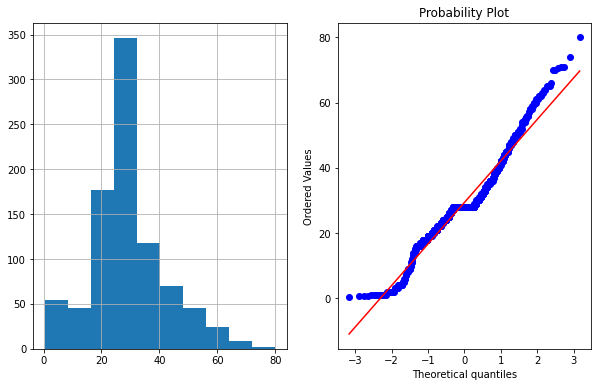

In [81]:
plot_data(df,'Age')

#Y-Axis - Age - in Probability plot - X Axis - Theoretical Quantile

#If All points fall in same line then we can say that it is Normally Distributed

#### 1. Logarithmic Conversion  [To convert into Gaussian Distribution]



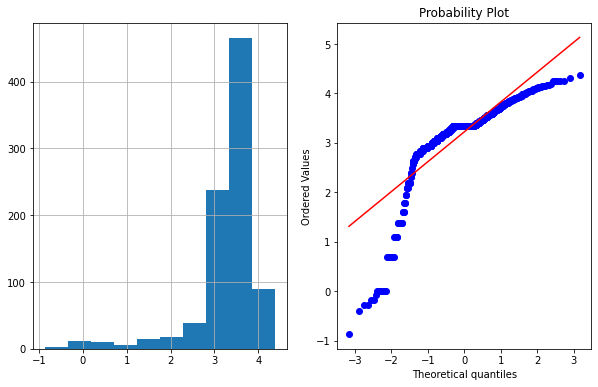

In [83]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

## Now once we applied Logarithmic conversion we can see that Points are not in same line
## So logarithmic conversion is not the Conversion that we will use 

### 2. Reciprocal Transformation


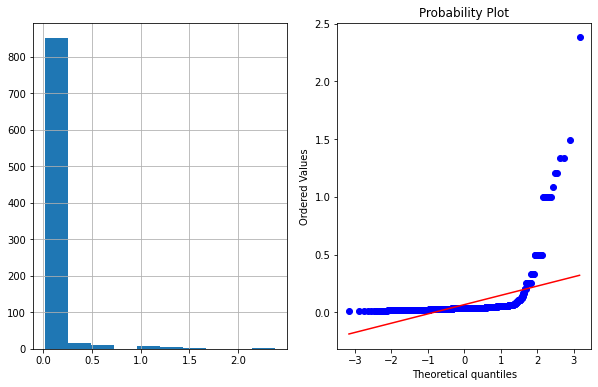

In [87]:
df['Age_reciprocal'] = 1/df.Age
plot_data(df,'Age_reciprocal')

## Points are not in line
## We cannot use these Conversion

### 3. Square root Transformation


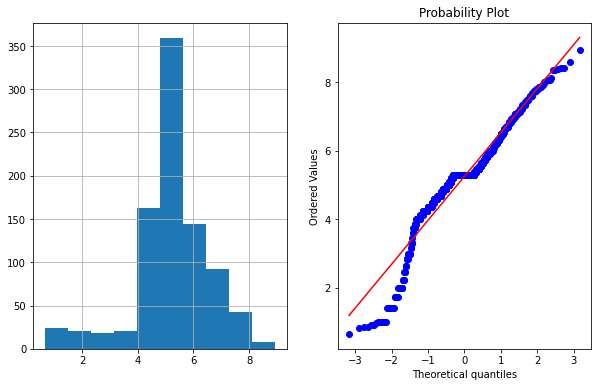

In [88]:
df['Age_sqr'] =  df.Age**(1/2)
plot_data(df,'Age_sqr')

## Here we can see that some of points are in same line

### 4. Exponential Transformation


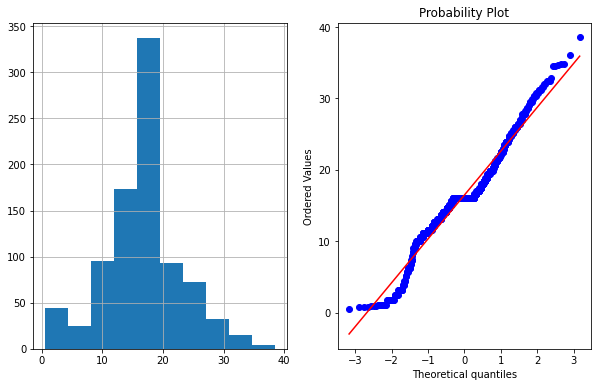

In [91]:
df['Age_Exponential'] = df.Age**(1/1.2)
plot_data(df,'Age_Exponential')

## We can use these because most of points are there in line 

### 5. Box Cox Transformation

In [92]:
df['Age_Boxcox'],parameters = stat.boxcox(df['Age']) ##Lambda = parameters

In [93]:
print(parameters)

0.7964531473656952


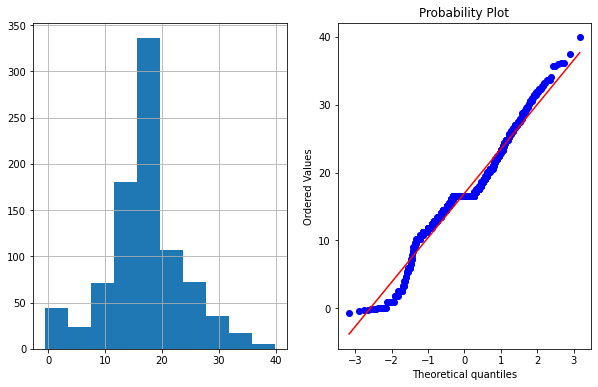

In [94]:
plot_data(df,'Age_Boxcox')

#### We can use Box Cox 

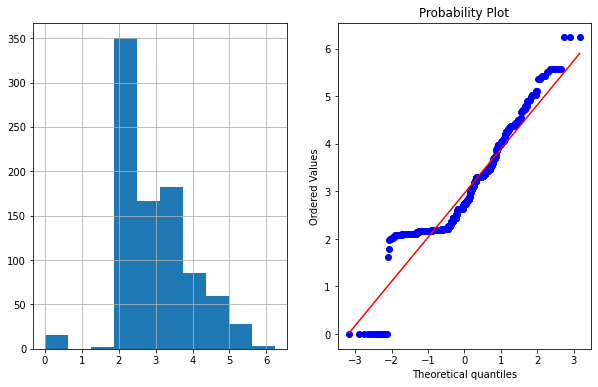

In [95]:
## Fare has 0 in values use log1p

df['Fare_log'] = np.log1p(df['Fare'])
plot_data(df,'Fare_log')

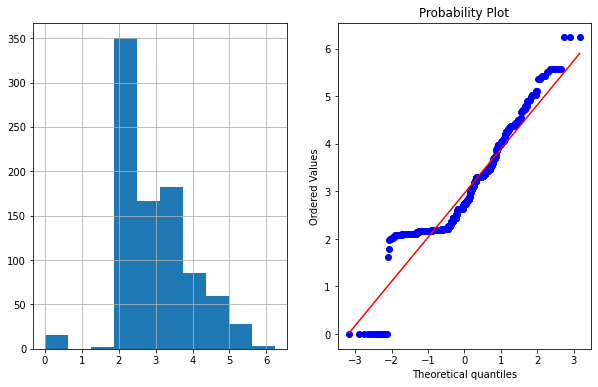

In [97]:
df['Fare_log'] = np.log(df['Fare']+1) #Instead oof log1p we can use these
plot_data(df,'Fare_log')

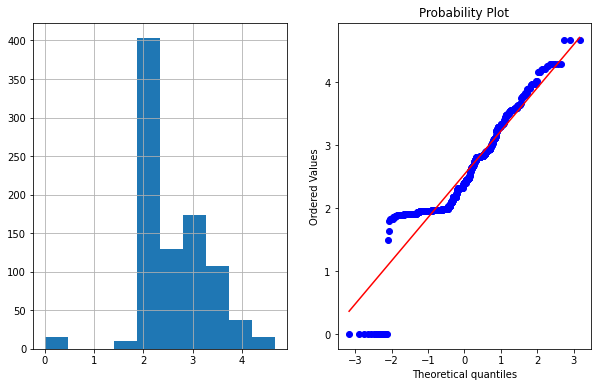

In [96]:
df['Fare_Boxcox'],parameters = stat.boxcox(df['Fare']+1) ##Lambda = parameters
plot_data(df,'Fare_Boxcox')

Which should be done First ?
Standardization/Normalization/Transformation

First check whether data is normally distributed or not .If it is Normally distributed Go with Standardization
Otherwise go with Transformation



------

## Handling Imbalanced Dataset



In [1]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [2]:
df.shape

(284807, 31)

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
## Independent and Dependent Features
X= df.drop('Class',axis=1)
y=df['Class']

#### Imbalanced Dataset doesnt affect Random Forest but it affects other algos

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [13]:
log_class = LogisticRegression()

#Hyper parameter tuning
grid = {'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv = KFold(n_splits=5,random_state=None,shuffle=False)

In [14]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [15]:
clf = GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

C:\Users\Lucky_Rathod\Anaconda3\envs\kn_course\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [16]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))

## For imbalanced dataset if you are getting better accuracy dont belive that
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

## Accuracy is 99% , But when you see w.r.t 1 - It is 68%

[[85254    42]
 [   49    98]]
0.998934962489613
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.70      0.67      0.68       147

    accuracy                           1.00     85443
   macro avg       0.85      0.83      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [17]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85292     4]
 [   34   113]]
0.9995552590615966
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.97      0.77      0.86       147

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.93     85443
weighted avg       1.00      1.00      1.00     85443



#### Random forest - Balanced - Modifying Class weights

In [19]:
X_train.shape

(199364, 30)

In [20]:
y_train.value_counts()

0    199019
1       345
Name: Class, dtype: int64

In [21]:
print(199019 * 1,345*100)

199019 34500


In [18]:
### We can tell Randomforest to give more importance to 1 instead of 0 in Dependent variable

## For Class 1 - Give 100 times more importance then class 0

## We will increase weight for 0 and 1 (Dependent Variable)
class_weight = dict({0:1,1:100})

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(class_weight = class_weight)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

## As you can see that there is no more diffrence in RandomForest and RandomForest-Class weights,So you can choose any one.
## But these method is very helpful when dataset size is very big

[[85294     2]
 [   34   113]]
0.9995786664794073
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.98      0.77      0.86       147

    accuracy                           1.00     85443
   macro avg       0.99      0.88      0.93     85443
weighted avg       1.00      1.00      1.00     85443



#### As you can see from above , Imbalanced dataset doesnt affect Randomforest, But it affects other ml algos

 Here we can clearly see that it is imbalanced dataset

### Techniques to handle Imbalanced dataset

1. Under Sampling
2. Over Sampling
3. SMOTETomek
4. Ensemble Techniques

### 1. Under Sampling 

Reduce the dataset size of Maximum Label \
0 - 10000 \
1 - 100

Reduce the size from 0 which will be equivalent to 1 
0 - 100 \
1 - 100

Here the Information gets Loss , So it is not widely used

In [25]:
y_train.value_counts()

0    199019
1       345
Name: Class, dtype: int64

In [28]:
from imblearn.under_sampling import NearMiss
from collections import Counter
## Now we will try to reduce the points of 0 to 80%
ns = NearMiss(0.8)  # 80% of 431 is 345 
X_train_ns,y_train_ns = ns.fit_sample(X_train,y_train)
print("Number of class before fit {} ".format(Counter(y_train)))
print("Number of class after fit {} ".format(Counter(y_train_ns)))

Number of class before fit Counter({0: 199019, 1: 345}) 
Number of class after fit Counter({0: 431, 1: 345}) 


In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

## Never do undersampling when dataset is less

[[68535 16761]
 [   16   131]]
0.8036468756949077
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     85296
           1       0.01      0.89      0.02       147

    accuracy                           0.80     85443
   macro avg       0.50      0.85      0.45     85443
weighted avg       1.00      0.80      0.89     85443



### 2. Over Sampling

Increase the dataset size of Min Label \
0 - 10000 \
1 - 100

Increase the size from 1 which will be equivalent to 0 \
0 - 10000 \
1 - 10000


In [30]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(0.5) ## 99509 is 50% of 199019

X_train_ns,y_train_ns = os.fit_sample(X_train,y_train)
print("Number of class before fit {} ".format(Counter(y_train)))
print("Number of class after fit {} ".format(Counter(y_train_ns)))

C:\Users\Lucky_Rathod\Anaconda3\envs\kn_course\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


Number of class before fit Counter({0: 199019, 1: 345}) 
Number of class after fit Counter({0: 199019, 1: 99509}) 


In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85292     4]
 [   28   119]]
0.9996254813150287
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.97      0.81      0.88       147

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



### 3. SMOTETomek 

It it combination of Over sampling and Under sampling. \
It creates new points of lowest label.Based on nearest points , New points are created

In [32]:
from imblearn.combine import SMOTETomek

os = SMOTETomek(0.75) ## 99509 is 50% of 199019
X_train_ns,y_train_ns = os.fit_sample(X_train,y_train)
print("Number of class before fit {} ".format(Counter(y_train)))
print("Number of class after fit {} ".format(Counter(y_train_ns)))

C:\Users\Lucky_Rathod\Anaconda3\envs\kn_course\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


Number of class before fit Counter({0: 199019, 1: 345}) 
Number of class after fit Counter({0: 198281, 1: 148526}) 


In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85280    16]
 [   27   120]]
0.9994967405170698
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.82      0.85       147

    accuracy                           1.00     85443
   macro avg       0.94      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



### 4. Ensemble Techniques



In [36]:
from imblearn.ensemble import EasyEnsembleClassifier

easy = EasyEnsembleClassifier()
easy.fit(X_train,y_train)

y_pred = easy.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

## Not working well

[[83120  2176]
 [   20   127]]
0.9742986552438467
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.06      0.86      0.10       147

    accuracy                           0.97     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.97      0.99     85443



## Outlier and Impact on Machine Learning

Observation that deviates from all other observation is Outlier - Credit Card Fraud Detection/Intrusion Detection

Some Dataset which have outliers are usefull - Credit Card Fraud,Anamoly detection,Whether person has cancer

#### Should outliers be removed ?

Depends on Dataset , If you see Titanic dataset - You can remove the outlier \ 
In Credit card Fraud detection - You cannot remove outlier

Sales Forecasting - There are some sudden spikes - We cannot remove

### Which machin learning algorithms are Sensitive (Getting Impacted) to Outliers ?

1. Naive Bayes Classifier - Not sensitive to outlier (Keep)
2. SVM - Not Sensitive to outlier (keep)
3. Linear Regression - Sensitive to outlier (Remove)
4. Logistic Regression -  Sensitive to outlier
5. Decision tree regression/classifier - Not sensitive to outlier
6. Ensemble (RF,XGBoost,GB) - Not Sensitive to outlier
7. KNN - Not Sensitive to outlier
8. KMeans - Sensitive to Outlier
9. Hierarchical - Sensitive to Outlier
10. PCA - Sensitive to Outlier
11. Neural Networks - Sensitive to Outlier

So whenever you get dataset of Credit Card Fraud detection only select that algorithms which are not Senstive.If you choose sensitive outlier algorithms then you need to remove outlier which is not useful in credit card fraud detection model.

In [1]:
import pandas as pd
df = pd.read_csv('titanic_train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [2]:
df['Age'].isnull().sum()

177

C:\Users\Lucky_Rathod\Anaconda3\envs\kn_course\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

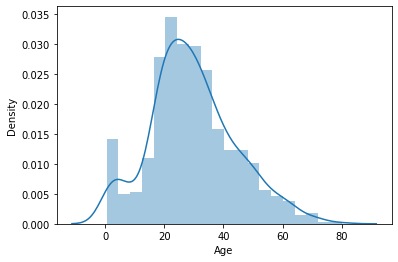

In [3]:
import seaborn as sns
sns.distplot(df['Age'].dropna())

## Normal Distribution without null values


C:\Users\Lucky_Rathod\Anaconda3\envs\kn_course\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

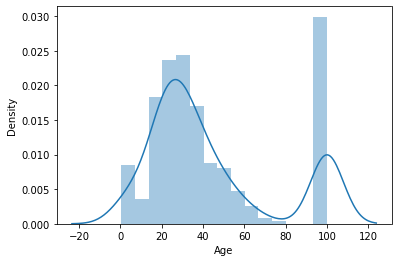

In [4]:
## Now we will creare outllier
sns.distplot(df['Age'].fillna(100))

## Now we can see that there is outlier

Text(0, 0.5, 'No of passengers')

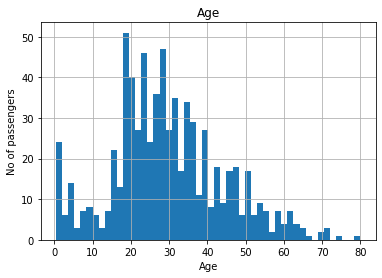

In [7]:
# Now we will see weather there is outlier , If we dont fillna with 100
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

#### When data is normally distributed , there is different technique to find outlier

<AxesSubplot:xlabel='Age'>

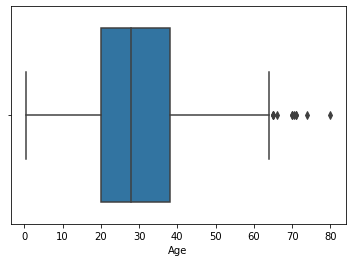

In [8]:
sns.boxplot(x='Age',data=df)

In [9]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
### Assuming Age follows Gaussian Distribution we will calculate boundaries which diffrentiates outiers.
### We know from Empirical formula of Gaussian Distribution , After 3rd std to left and right (It covers 99.7 % data) there is an outlier 


### In case of gaussian distribution we will only calculate upper and lower boundary

### Anything outside that is outlier
upper_boundary = df['Age'].mean() + 3 *  df['Age'].std()
lower_boundary = df['Age'].mean() - 3 *  df['Age'].std()

print(upper_boundary) , print(lower_boundary) , print(df['Age'].mean()) , print(df['Age'].std())

73.27860964406094
-13.880374349943303
29.69911764705882
14.526497332334042


(None, None, None, None)

#### Similarly we will calculate for Fare column

#### Fare feature consist of Skewed data

In [15]:
df['Fare'].isnull().sum()

0

C:\Users\Lucky_Rathod\Anaconda3\envs\kn_course\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

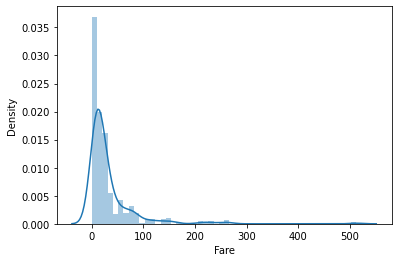

In [16]:
import seaborn as sns
sns.distplot(df['Fare'])

Text(0, 0.5, 'No of passengers')

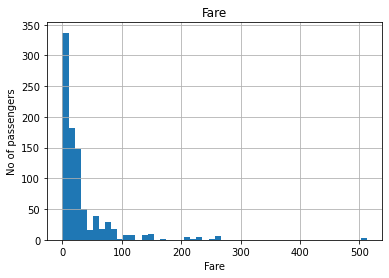

In [32]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

##### Dataset is not Normally Distributed - It is Skewed dataset

<AxesSubplot:xlabel='Fare'>

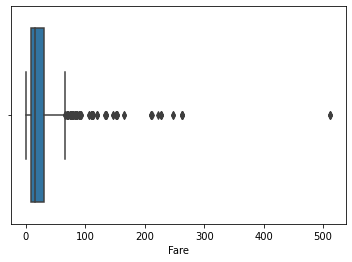

In [19]:
sns.boxplot(x='Fare',data=df)

In [20]:
df['Fare'].describe()

#You can see difference between max and 75%

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [22]:
### We will not calculate Upper and Lower boundary because Fare feature is not normally distributed
### lets compute Interquantile range to calculate boundaries

iqr = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
print(iqr)

23.0896


In [23]:
lower_bridge = df['Fare'].quantile(0.25) - (iqr * 1.5)
upper_bridge = df['Fare'].quantile(0.75) + (iqr * 1.5)
print(lower_bridge) , print(upper_bridge)


-26.724
65.6344


(None, None)

In [25]:
### When data is Skewed you need to take Extreme Outlier
###For Extreme Outliers
lower_bridge = df['Fare'].quantile(0.25) - (iqr * 3)
upper_bridge = df['Fare'].quantile(0.75) + (iqr * 3)
print(lower_bridge) , print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [27]:
data = df.copy()

In [28]:
### Remove outlier from Age w.r.t upper and lower boundary
data.loc[data['Age'] > 73,'Age']=73
data['Age'].describe() #Max val - 73

count    714.000000
mean      29.687913
std       14.490589
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       73.000000
Name: Age, dtype: float64

In [50]:
### Remove Outlier from Age w.r.t upper bridge and lower bridge - If feature is Not normally distributed
data.loc[data['Fare'] > 100,'Fare' ] =100
data['Fare'].describe()

count    891.000000
mean      27.027169
std       27.296632
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      100.000000
Name: Fare, dtype: float64

Text(0, 0.5, 'No of passengers')

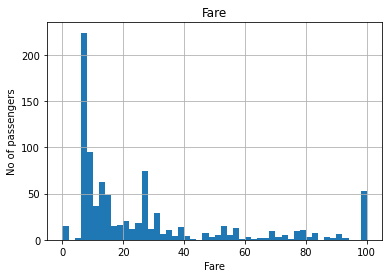

In [33]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

In [35]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            172
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          677
Embarked         2
dtype: int64

In [56]:
### Macine Learning

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

## Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
#print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy score 0.6865671641791045


In [64]:
## Random Forest Classifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
#print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy score 0.7089552238805971
